# Forest Cover Prediction 

This was a project done as a part of the machine learning course at Amrita Vishwa Vidyapeetham

## Problem Statement

- Data about tree observations from 4 different areas in Roosevalut National Forest in Colorado
- Observations are cartographic variables (relating to maps) from 30x30 meter sections of forest
- we are given 10 continuous variables, 44 one hot encoded columns with which we are said to predict the target value(`Cover_Type`)

<img src='forest-cover.jpg' width='300px' height='auto'>

In [ ]:
# basic imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import warnings
warnings.filterwarnings('ignore')

## Importing Dataset

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML_SEM5/project/train.csv')
df

FileNotFoundError: ignored

In [8]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: ignored

# 1. Understand, clean and format data

In [ ]:
print("Number of rows and columns in the trees dataset are:", df.shape)

NameError: ignored

In [ ]:
df.head()

Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0   1       2596      51      3                               258   
1   2       2590      56      2                               212   
2   3       2804     139      9                               268   
3   4       2785     155     18                               242   
4   5       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  ...  Soil_Type32  \
0            221             232            148  ...            0   
1            220             235            151  ...            0   
2            234             238            135  ...            0   
3            238             238            122  ...            0   
4            220             234            150  ...            0   

   Soil_Type33  Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type38  Soil_Type39  Soil_Type40  Cover_Type  
0            0            0            0           5  
1            0            0            0           5  
2            0            0            0           2  
3            0            0            0           2  
4            0            0            0           5  

[5 rows x 56 columns]

In [ ]:
df.tail()

Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
15115  15116       2607     243     23                               258   
15116  15117       2603     121     19                               633   
15117  15118       2492     134     25                               365   
15118  15119       2487     167     28                               218   
15119  15120       2475     197     34                               319   

       Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
15115                               7                              660   
15116                             195                              618   
15117                             117                              335   
15118                             101                              242   
15119                              78                              270   

       Hillshade_9am  Hillshade_Noon  Hillshade_3pm  ...  Soil_Type32  \
15115            170             251            214  ...            0   
15116            249             221             91  ...            0   
15117            250             220             83  ...            0   
15118            229             237            119  ...            0   
15119            189             244            164  ...            0   

       Soil_Type33  Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  \
15115            0            0            0            0            0   
15116            0            0            0            0            0   
15117            0            0            0            0            0   
15118            0            0            0            0            0   
15119            0            0            0            0            0   

       Soil_Type38  Soil_Type39  Soil_Type40  Cover_Type  
15115            0            0            0           3  
15116            0            0            0           3  
15117            0            0            0           3  
15118            0            0            0           3  
15119            0            0            0           3  

[5 rows x 56 columns]

In [ ]:
df.shape

(15120, 56)

## 1.1-Displaying desc() and info()
Information (how many rows and columns, data types and non-null values) and descriptive statistics of the dataset

In [ ]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

None

In [ ]:
display(df.describe())

Id     Elevation        Aspect         Slope  \
count  15120.00000  15120.000000  15120.000000  15120.000000   
mean    7560.50000   2749.322553    156.676653     16.501587   
std     4364.91237    417.678187    110.085801      8.453927   
min        1.00000   1863.000000      0.000000      0.000000   
25%     3780.75000   2376.000000     65.000000     10.000000   
50%     7560.50000   2752.000000    126.000000     15.000000   
75%    11340.25000   3104.000000    261.000000     22.000000   
max    15120.00000   3849.000000    360.000000     52.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                      15120.000000                    15120.000000   
mean                         227.195701                       51.076521   
std                          210.075296                       61.239406   
min                            0.000000                     -146.000000   
25%                           67.000000                        5.000000   
50%                          180.000000                       32.000000   
75%                          330.000000                       79.000000   
max                         1343.000000                      554.000000   

       Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
count                     15120.000000   15120.000000    15120.000000   
mean                       1714.023214     212.704299      218.965608   
std                        1325.066358      30.561287       22.801966   
min                           0.000000       0.000000       99.000000   
25%                         764.000000     196.000000      207.000000   
50%                        1316.000000     220.000000      223.000000   
75%                        2270.000000     235.000000      235.000000   
max                        6890.000000     254.000000      254.000000   

       Hillshade_3pm  ...   Soil_Type32   Soil_Type33   Soil_Type34  \
count   15120.000000  ...  15120.000000  15120.000000  15120.000000   
mean      135.091997  ...      0.045635      0.040741      0.001455   
std        45.895189  ...      0.208699      0.197696      0.038118   
min         0.000000  ...      0.000000      0.000000      0.000000   
25%       106.000000  ...      0.000000      0.000000      0.000000   
50%       138.000000  ...      0.000000      0.000000      0.000000   
75%       167.000000  ...      0.000000      0.000000      0.000000   
max       248.000000  ...      1.000000      1.000000      1.000000   

        Soil_Type35   Soil_Type36   Soil_Type37   Soil_Type38   Soil_Type39  \
count  15120.000000  15120.000000  15120.000000  15120.000000  15120.000000   
mean       0.006746      0.000661      0.002249      0.048148      0.043452   
std        0.081859      0.025710      0.047368      0.214086      0.203880   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

        Soil_Type40    Cover_Type  
count  15120.000000  15120.000000  
mean       0.030357      4.000000  
std        0.171574      2.000066  
min        0.000000      1.000000  
25%        0.000000      2.000000  
50%        0.000000      4.000000  
75%        0.000000      6.000000  
max        1.000000      7.000000  

[8 rows x 56 columns]

## 1.2 
Information (how many rows and columns, data types and non-null values) and descriptive statistics of the dataset

In [ ]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

None

In [ ]:
df.isnull().sum()

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


In [ ]:
display(df.describe())

Id     Elevation        Aspect         Slope  \
count  15120.00000  15120.000000  15120.000000  15120.000000   
mean    7560.50000   2749.322553    156.676653     16.501587   
std     4364.91237    417.678187    110.085801      8.453927   
min        1.00000   1863.000000      0.000000      0.000000   
25%     3780.75000   2376.000000     65.000000     10.000000   
50%     7560.50000   2752.000000    126.000000     15.000000   
75%    11340.25000   3104.000000    261.000000     22.000000   
max    15120.00000   3849.000000    360.000000     52.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                      15120.000000                    15120.000000   
mean                         227.195701                       51.076521   
std                          210.075296                       61.239406   
min                            0.000000                     -146.000000   
25%                           67.000000                        5.000000   
50%                          180.000000                       32.000000   
75%                          330.000000                       79.000000   
max                         1343.000000                      554.000000   

       Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
count                     15120.000000   15120.000000    15120.000000   
mean                       1714.023214     212.704299      218.965608   
std                        1325.066358      30.561287       22.801966   
min                           0.000000       0.000000       99.000000   
25%                         764.000000     196.000000      207.000000   
50%                        1316.000000     220.000000      223.000000   
75%                        2270.000000     235.000000      235.000000   
max                        6890.000000     254.000000      254.000000   

       Hillshade_3pm  ...   Soil_Type32   Soil_Type33   Soil_Type34  \
count   15120.000000  ...  15120.000000  15120.000000  15120.000000   
mean      135.091997  ...      0.045635      0.040741      0.001455   
std        45.895189  ...      0.208699      0.197696      0.038118   
min         0.000000  ...      0.000000      0.000000      0.000000   
25%       106.000000  ...      0.000000      0.000000      0.000000   
50%       138.000000  ...      0.000000      0.000000      0.000000   
75%       167.000000  ...      0.000000      0.000000      0.000000   
max       248.000000  ...      1.000000      1.000000      1.000000   

        Soil_Type35   Soil_Type36   Soil_Type37   Soil_Type38   Soil_Type39  \
count  15120.000000  15120.000000  15120.000000  15120.000000  15120.000000   
mean       0.006746      0.000661      0.002249      0.048148      0.043452   
std        0.081859      0.025710      0.047368      0.214086      0.203880   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

        Soil_Type40    Cover_Type  
count  15120.000000  15120.000000  
mean       0.030357      4.000000  
std        0.171574      2.000066  
min        0.000000      1.000000  
25%        0.000000      2.000000  
50%        0.000000      4.000000  
75%        0.000000      6.000000  
max        1.000000      7.000000  

[8 rows x 56 columns]

In [ ]:
df.corr()

Id  Elevation    Aspect     Slope  \
Id                                  1.000000   0.185496  0.017702 -0.020168   
Elevation                           0.185496   1.000000 -0.011096 -0.312640   
Aspect                              0.017702  -0.011096  1.000000  0.028148   
Slope                              -0.020168  -0.312640  0.028148  1.000000   
Horizontal_Distance_To_Hydrology    0.099637   0.412712  0.040732 -0.055976   
Vertical_Distance_To_Hydrology      0.055348   0.122092  0.056412  0.265314   
Horizontal_Distance_To_Roadways    -0.033028   0.578659  0.066184 -0.277049   
Hillshade_9am                       0.000786   0.097900 -0.593997 -0.200072   
Hillshade_Noon                      0.073123   0.215782  0.324912 -0.612613   
Hillshade_3pm                       0.042524   0.089518  0.635022 -0.326887   
Horizontal_Distance_To_Fire_Points -0.068739   0.443563 -0.052169 -0.239527   
Wilderness_Area1                   -0.339861   0.330417 -0.131262 -0.152820   
Wilderness_Area2                    0.158484   0.261729  0.028238 -0.065923   
Wilderness_Area3                    0.384219   0.354025  0.032578 -0.113033   
Wilderness_Area4                   -0.158451  -0.783651  0.075228  0.286985   
Soil_Type1                         -0.058451  -0.218818 -0.024538  0.099355   
Soil_Type2                          0.045545  -0.147947 -0.020970 -0.081498   
Soil_Type3                         -0.045757  -0.307523 -0.069120  0.265541   
Soil_Type4                          0.118214  -0.125342  0.018019  0.087841   
Soil_Type5                         -0.041713  -0.141478  0.000343  0.074720   
Soil_Type6                         -0.046017  -0.187354 -0.006066 -0.047868   
Soil_Type7                               NaN        NaN       NaN       NaN   
Soil_Type8                         -0.013159   0.002934  0.001723 -0.012989   
Soil_Type9                         -0.014219  -0.010571 -0.019391 -0.022220   
Soil_Type10                         0.032292  -0.357816  0.111959  0.255804   
Soil_Type11                         0.063372  -0.037906 -0.034549 -0.109798   
Soil_Type12                        -0.129930   0.017432 -0.044142 -0.115088   
Soil_Type13                         0.015145   0.039304  0.024312  0.119863   
Soil_Type14                        -0.016034  -0.140619  0.001181 -0.054085   
Soil_Type15                              NaN        NaN       NaN       NaN   
Soil_Type16                        -0.003794  -0.066252  0.027121 -0.064321   
Soil_Type17                        -0.002940  -0.200663  0.029870 -0.124375   
Soil_Type18                        -0.070252  -0.035173 -0.042140 -0.069326   
Soil_Type19                        -0.029707   0.029808  0.007570 -0.047742   
Soil_Type20                        -0.069537   0.008548 -0.023330 -0.068508   
Soil_Type21                         0.014734   0.032509  0.018815 -0.033935   
Soil_Type22                         0.035739   0.146236  0.022301 -0.076393   
Soil_Type23                        -0.017422   0.159872  0.041880 -0.184528   
Soil_Type24                         0.034019   0.097647  0.005480  0.017982   
Soil_Type25                         0.005675   0.010586 -0.002340  0.011062   
Soil_Type26                         0.031176   0.020669 -0.009775 -0.030700   
Soil_Type27                         0.024141   0.040019  0.018986  0.012295   
Soil_Type28                        -0.005104  -0.001077  0.026330  0.036082   
Soil_Type29                        -0.231780   0.165304 -0.063428 -0.083108   
Soil_Type30                        -0.157515   0.048204 -0.086897  0.118725   
Soil_Type31                         0.025826   0.093191  0.008160 -0.076851   
Soil_Type32                         0.068048   0.172349  0.003700 -0.147258   
Soil_Type33                         0.066887   0.123821  0.018719  0.072027   
Soil_Type34                         0.022520   0.021876  0.012927 -0.030590   
Soil_Type35                         0.057480   0.120157 -0.004235 -0.048855   
Soil_Type36  

### Checking for Skewness

In [ ]:
df.iloc[:,:10].skew()

Id                                  0.000000
Elevation                           0.075640
Aspect                              0.450935
Slope                               0.523658
Horizontal_Distance_To_Hydrology    1.488052
Vertical_Distance_To_Hydrology      1.537776
Horizontal_Distance_To_Roadways     1.247811
Hillshade_9am                      -1.093681
Hillshade_Noon                     -0.953232
Hillshade_3pm                      -0.340827
dtype: float64

- If Positive, Left Skewed
- If Negative, Right Skewed
- If the data is skewed, then we will have to transform the data into normal distribution/gausian surface for better prediction

## 1.3 
Check for Anomalies and outliers

We are going to be removing EXTREME OUTLIERS only so as to retain more rows. 

<b> Mild Outliers </b>
- x < Q1 - 1.5 * IQR       
- x > Q3 + 1.5 * IQR

<b> Extreme Outliers </b>
- x < Q1 - 3 * IQR       
- x > Q3 + 3 * IQR

In [ ]:
import numpy as np
def calculateoutlier(df, col_name):
    
    first_quartile = np.percentile(np.array(df[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(df[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile
                      
    upper_limit = third_quartile+(3*IQR)
    lower_limit = first_quartile-(3*IQR)
    outlier_count = 0
                      
    for value in df[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
    return lower_limit, upper_limit, outlier_count



In [ ]:
# loop through all columns 
for column in df.columns:
    if calculateoutlier(df, column)[2] > 0:
        print('There are ',calculateoutlier(df,column)[2],' outliers in ',column)
        

There are  53  outliers in  Horizontal_Distance_To_Hydrology
There are  49  outliers in  Vertical_Distance_To_Hydrology
There are  3  outliers in  Horizontal_Distance_To_Roadways
There are  7  outliers in  Hillshade_9am
There are  20  outliers in  Hillshade_Noon
There are  132  outliers in  Horizontal_Distance_To_Fire_Points
There are  3597  outliers in  Wilderness_Area1
There are  499  outliers in  Wilderness_Area2
There are  355  outliers in  Soil_Type1
There are  623  outliers in  Soil_Type2
There are  962  outliers in  Soil_Type3
There are  843  outliers in  Soil_Type4
There are  165  outliers in  Soil_Type5
There are  650  outliers in  Soil_Type6
There are  1  outliers in  Soil_Type8
There are  10  outliers in  Soil_Type9
There are  2142  outliers in  Soil_Type10
There are  406  outliers in  Soil_Type11
There are  227  outliers in  Soil_Type12
There are  476  outliers in  Soil_Type13
There are  169  outliers in  Soil_Type14
There are  114  outliers in  Soil_Type16
There are  612  

In [ ]:
# finding data range
for column in list(df):
    print("{} : {} - {} ".format(column, df[column].min(), df[column].max()))

Id : 1 - 15120 
Elevation : 1863 - 3849 
Aspect : 0 - 360 
Slope : 0 - 52 
Horizontal_Distance_To_Hydrology : 0 - 1343 
Vertical_Distance_To_Hydrology : -146 - 554 
Horizontal_Distance_To_Roadways : 0 - 6890 
Hillshade_9am : 0 - 254 
Hillshade_Noon : 99 - 254 
Hillshade_3pm : 0 - 248 
Horizontal_Distance_To_Fire_Points : 0 - 6993 
Wilderness_Area1 : 0 - 1 
Wilderness_Area2 : 0 - 1 
Wilderness_Area3 : 0 - 1 
Wilderness_Area4 : 0 - 1 
Soil_Type1 : 0 - 1 
Soil_Type2 : 0 - 1 
Soil_Type3 : 0 - 1 
Soil_Type4 : 0 - 1 
Soil_Type5 : 0 - 1 
Soil_Type6 : 0 - 1 
Soil_Type7 : 0 - 0 
Soil_Type8 : 0 - 1 
Soil_Type9 : 0 - 1 
Soil_Type10 : 0 - 1 
Soil_Type11 : 0 - 1 
Soil_Type12 : 0 - 1 
Soil_Type13 : 0 - 1 
Soil_Type14 : 0 - 1 
Soil_Type15 : 0 - 0 
Soil_Type16 : 0 - 1 
Soil_Type17 : 0 - 1 
Soil_Type18 : 0 - 1 
Soil_Type19 : 0 - 1 
Soil_Type20 : 0 - 1 
Soil_Type21 : 0 - 1 
Soil_Type22 : 0 - 1 
Soil_Type23 : 0 - 1 
Soil_Type24 : 0 - 1 
Soil_Type25 : 0 - 1 
Soil_Type26 : 0 - 1 
Soil_Type27 : 0 - 1 
Soil_

Now that we have calculated the extreme outliers, we need to clean the dataset by dropping rows.

The columns we have chosen for outlier elimination are

* Horizontal_Distance_To_Hydrology
* Vertical_Distance_To_Hydrology
* Slope
* Horizontal_Distance_To_Fire_Points

We have chosen these particular cols compared to the other cols because their data range is already fixed between 0 and 255 (e.g. Hillsahde columns)  or they seem like one-hot-encoded columns (e.g. Soil type and Wilderness areas).

Out of these 4, Horizontal_Distance_To_Hydrology is the column we will be removing outliers from as it has the lowest correlation to cover type

Then we will remove outliers for Horizontal_Distance_To_Roadways as logically it doesn't seem to affect the growth of trees much. However for both cases we will only remove extreme outliers as we want to retain as many rows as possible

In [ ]:
df = df[(df['Horizontal_Distance_To_Hydrology'] > calculateoutlier(df, 'Horizontal_Distance_To_Hydrology')[0]) &
              (df['Horizontal_Distance_To_Hydrology'] < calculateoutlier(df, 'Horizontal_Distance_To_Hydrology')[1])]
df.shape

(15067, 56)

In [ ]:
df = df[(df['Horizontal_Distance_To_Roadways'] > calculateoutlier(df, 'Horizontal_Distance_To_Roadways')[0]) &
              (df['Horizontal_Distance_To_Roadways'] < calculateoutlier(df, 'Horizontal_Distance_To_Roadways')[1])]
df.shape

(15063, 56)

Number of the rows in the dataset is approximately 15063, after the removal.

## 1.4 


`Cover_Type` is our label/target column. `Wilderness_Area` and `Soil_Type` columns might have binary values (0,1) if so, they are the one-hot-encoded columns of 4 wilderness areas and 40 soil types respectively. I am going to start exploratory data analysis by seeking answer to that suspicion.

# 2. Exploratory Data Analysis

## 2.1 
Check if Wilderness_Area and Soil_Type columns have only binary values to confirm they are one hot encoded values

In [ ]:
is_ohe = [column for column in df.columns if ("Wilderness" in column) | ("Soil" in column)]
pd.unique(df[is_ohe].values.ravel())

array([1, 0], dtype=int64)

They are only binary values

## 2.2
Can a Tree belong to multiple soil types and wilderness areas ?

In [ ]:
df["w_sum"] = df["Wilderness_Area1"] + df["Wilderness_Area2"] + df["Wilderness_Area3"] + df["Wilderness_Area4"]
print(df.w_sum.value_counts())

1    14988
Name: w_sum, dtype: int64


In [ ]:
soil_columns = [c for c in df.columns if "Soil" in c]
df["soil_sum"] = 0

# sum of all soil type columns
for c in soil_columns:
    df["soil_sum"] += df[c]

print(df.soil_sum.value_counts())

1    14988
Name: soil_sum, dtype: int64


In [ ]:
df.drop(columns=["w_sum", "soil_sum"], inplace=True)

`Wilderness_Area` and `Soil_Type1-40` having only binary values and only one `soil_type` or `wilderness_area` being equal to 1, shows that they are one-hot-encoded columns.

One important thing about the trees are, they can only belong to one soil type or one wilderness area.

## 2.3
 Distribution of the Fantastic Trees

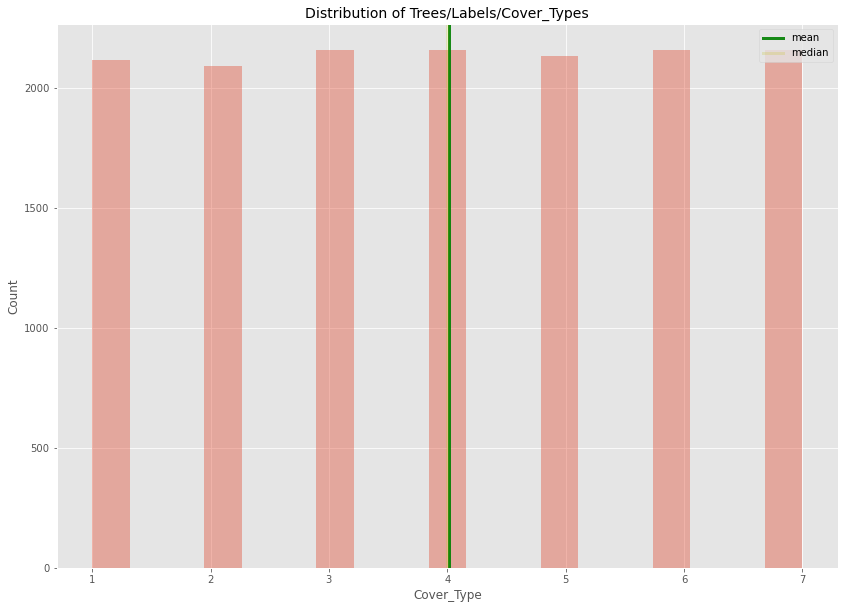

In [ ]:
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_context(font_scale=2)

figsize(14,10)

# set the histogram, mean and median
sns.distplot(df["Cover_Type"], kde=False)
plt.axvline(x=df.Cover_Type.mean(), linewidth=3, color='g', label="mean", alpha=0.9)
plt.axvline(x=df.Cover_Type.median(), linewidth=3, color='y', label="median", alpha=0.19)

# set title, legends and labels
plt.xlabel("Cover_Type")
plt.ylabel("Count")
plt.title("Distribution of Trees/Labels/Cover_Types", size=14)
plt.legend(["mean", "median"])

Distribution of trees shows Cover type 2 has the most trees.

Here are the 7 types of the fantastic trees, numbered from 1 to 7 in the `Cover_Type` column:

1) Spruce/Fir

2) Lodgepole Pine

3) Ponderosa Pine

4) Cottonwood/Willow

5) Aspen

6) Douglas-fir

7) Krummholz

## 2.4 
Check if the Cover_Type shows non-uniform distribution among different Wilderness_Areas

Text(0.5, 1.0, 'Density of Cover Types Among Different Wilderness Areas')

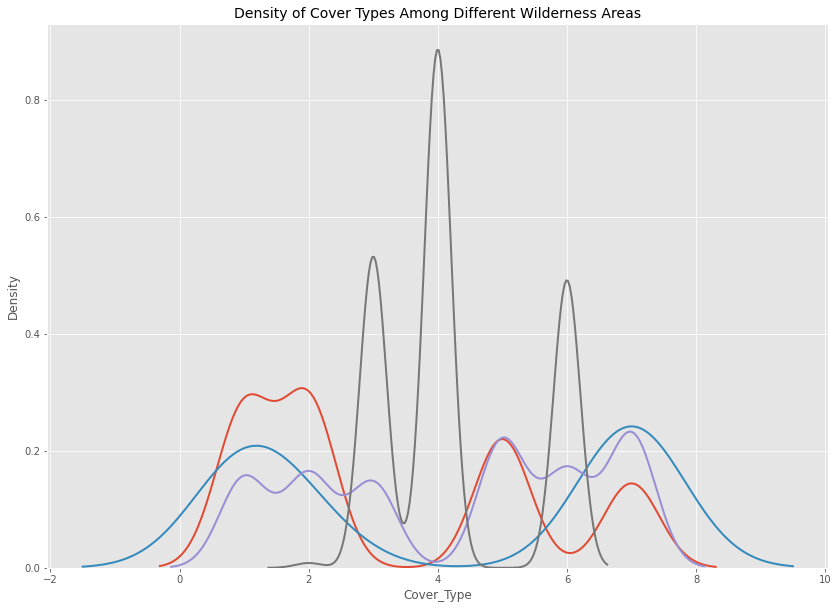

In [ ]:
# Create one column as Wilderness_Area_Type and represent it as categorical data
df['Wilderness_Area_Type'] = (df.iloc[:, 11:15] == 1).idxmax(1)

#list of wilderness areas
wilderness_areas = sorted(df['Wilderness_Area_Type'].value_counts().index.tolist())

# distribution of the cover type in different wilderness areas
figsize(14,10)

# plot cover_type distribution for each wilderness area
for area in wilderness_areas:
    subset = df[df['Wilderness_Area_Type'] == area]
    sns.kdeplot(subset["Cover_Type"], label=area, linewidth=2)

# set title, legends and labels
plt.ylabel("Density")
plt.xlabel("Cover_Type")
plt.title("Density of Cover Types Among Different Wilderness Areas", size=14)

Nother important finding about Trees: Wilderness area is an important feature to determine the cover type:
* Spruce/Fir, Lodgepole Pine and Krummholz (Cover_Type 1, 2, 7)  mostly found in Rawah, Neota and Comanche Peak Wilderness Area(1,2 and 3).
* It is highly likely to find Ponderosa Pine (Cover_Type 3) in Cache la Poudre Wilderness Area (4) rather than other areas.
* Cottonwood/Willow (Cover_Type 4) seems to be found only in Cache la Poudre Wilderness Area (4).
* Aspen (Cover_Type 5) is equally likely to come from wilderness area Rawah and Comanche (1,3).
* Douglas-fir (Cover_Type 6) can be found in any of the wilderness areas.

Note that, distribution of cover types extend more than the range because of the kernel density estimation.

## 2.5

In [ ]:
def split_numbers_chars(row):
    head = row.rstrip('0123456789')
    tail = row[len(head):]
    return head, tail

def reverse_one_hot_encode(dataframe, start_loc, end_loc, numeric_column_name):
    dataframe['String_Column'] = (dataframe.iloc[:, start_loc:end_loc] == 1).idxmax(1)
    dataframe['Tuple_Column'] = dataframe['String_Column'].apply(split_numbers_chars)
    dataframe[numeric_column_name] = dataframe['Tuple_Column'].apply(lambda x: x[1]).astype('int64')
    dataframe.drop(columns=['String_Column','Tuple_Column'], inplace=True)

In [ ]:
reverse_one_hot_encode(df, 16, 56, "Soil_Type")

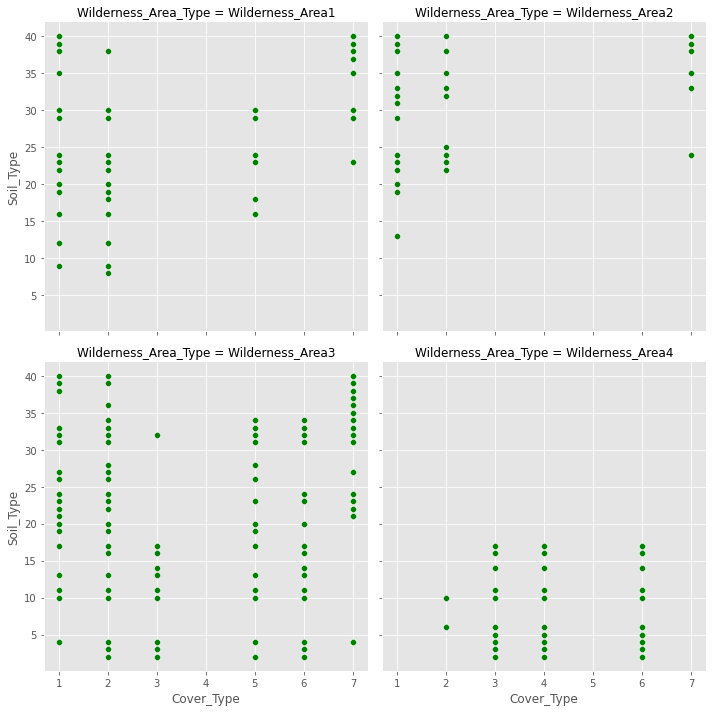

In [ ]:
# plot relationship of soil type and cover type among different wilderness areas
g = sns.FacetGrid(df, col="Wilderness_Area_Type", 
                  col_wrap=2, height=5, col_order=wilderness_areas)
g = g.map(plt.scatter,"Cover_Type", "Soil_Type", edgecolor="w", color="g")

## Basic Relation between all the continuous variable

* till know we have seen the relationship between columns on WildernessArea, SoilType, CoverType
    - where WildernessArea and SoilType were binary
    - and CoverType was of 7 diff types
* now let's move on and see relationship for every other column i.e
    - Elevation
    - Aspect
    - Slope
    - Distance
    - Hillshade Cols

In [ ]:
continuous_variables = df.columns[1:11].tolist()
continuous_variables
# 11,12,13,14 are wilderness area, after that there is soil types and then cover types

['Elevation',
 'Aspect',
 'Slope',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points']

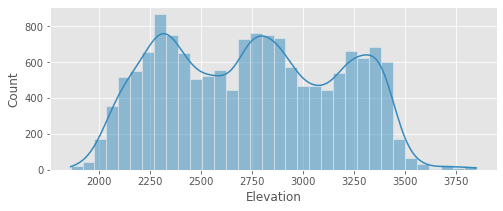

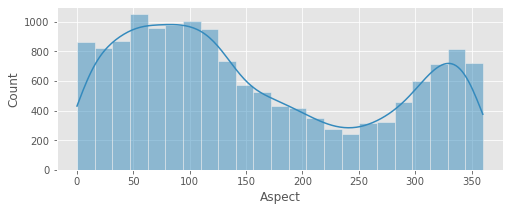

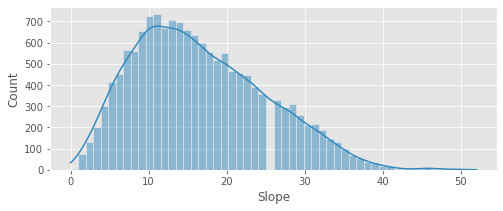

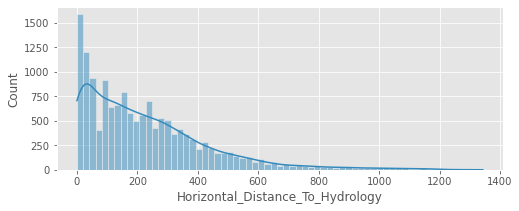

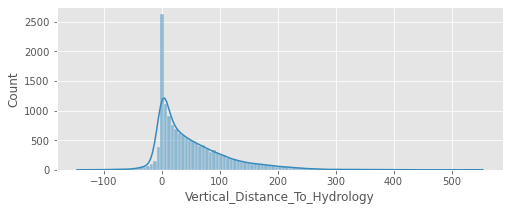

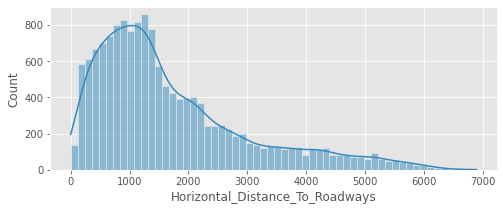

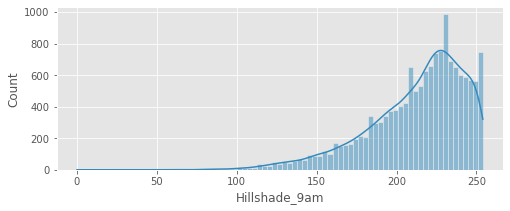

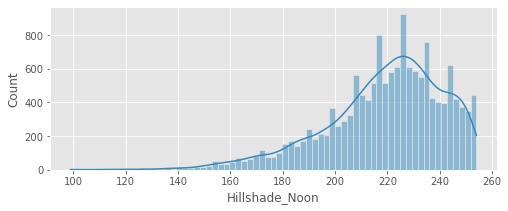

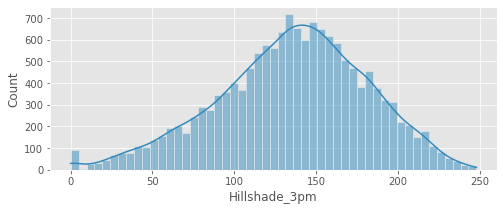

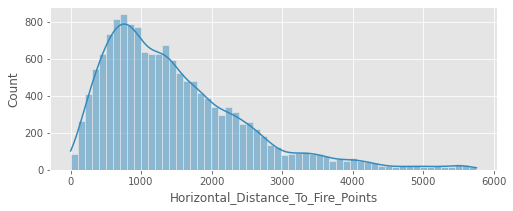

In [ ]:
for i in continuous_variables : 
    fig, ax = plt.subplots(figsize=(8, 3))
    sns.histplot(data=df, x=i, kde=True)
    plt.show()

# plt.hist(df[:11])

### Basic Inference
- In case of `Slope`, there is higher density at 10 degrees
- `Vertical_Distance_To_Hydrology` and `Horizontal_Distance_To_Hydrology` have higher density at 0 meaing that water surface lines are mostly right at the tree itself, and the frequency reduces with higher distance, meaning that there are less trees at that range
- Comparing `Hillshade_9am`, `Hillshade_Noon` and `Hillshade_3pm`
    - we can see that the illumination per unit is decreasing from 9am to 3pm
    - Illumination is moving from 225 in case of 9am to 125 at 3pm (i.e trees are getting more light at 9am than at 3pm)

## Comparing and bringing inference from Hydrology distance

In [ ]:
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Vertical_Distance_To_Hydrology VS Horizontal_Distance_To_Hydrology')

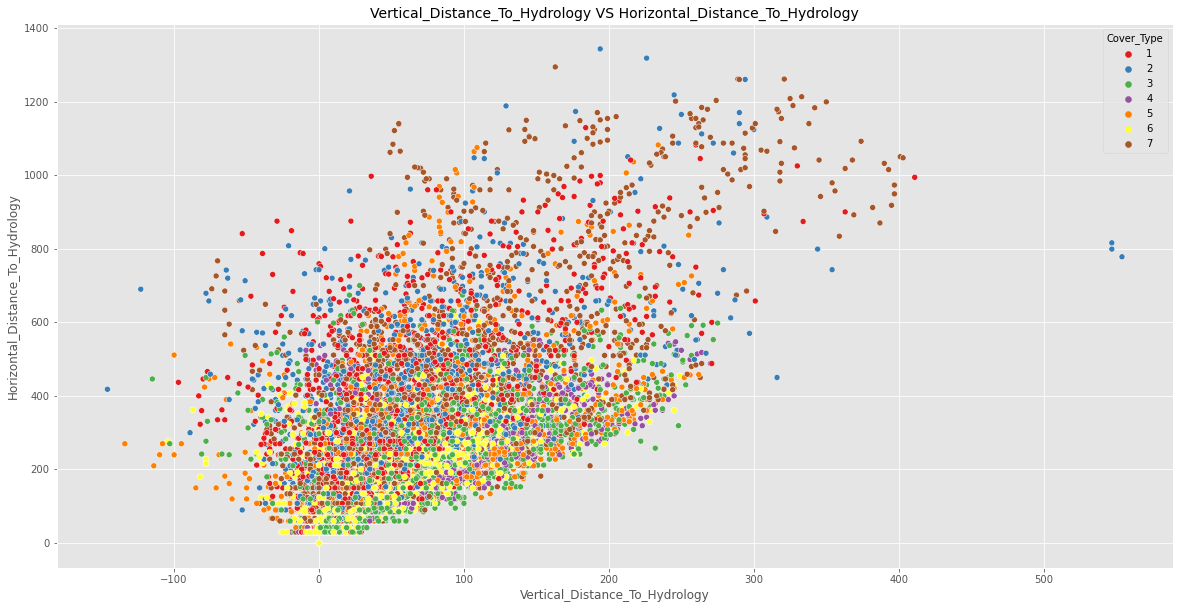

In [ ]:
figsize(20,10)
sns.scatterplot(x="Vertical_Distance_To_Hydrology", y="Horizontal_Distance_To_Hydrology", 
                hue="Cover_Type", data=df, 
                legend="full", hue_norm=(0,8), palette="Set1")
plt.title("Vertical_Distance_To_Hydrology VS Horizontal_Distance_To_Hydrology", size=14)

- `Vertical_Distance_To_Hydrology` = is the vertical distance to the nearest surface water features(i.e water inside the soil or water bodies)
- `Horizontal_Distance_To_Hydrology` = is the horizonatal distance to the nearest surface water features

`Vertical_Distance_To_Hydrology` and `Horizontal_Distance_To_Hydrology` are plotted in the x and y axis of the scatter plot respectfully
- The measuring point in this case is the the Tree that falls in a singular wildernessArea and SoilType and is of a particular CoverType
- Bottom left part = Points closer to 0 vertically as well as horizontally mean that water surface is nearby
- From the graph we can infer that most of the trees fall in the distance of 0 to 200 `Vertical_Distance_To_Hydrology` and 0 to 600 `Horizontal_Distance_To_Hydrology`

<img src='water-suface-lines.jpg' width='350px' height='auto'><br>
An image showing the water surface lines for easy visualization

## Relation between Elevation and slope

Text(0.5, 1.0, 'Elevation VS Slope')

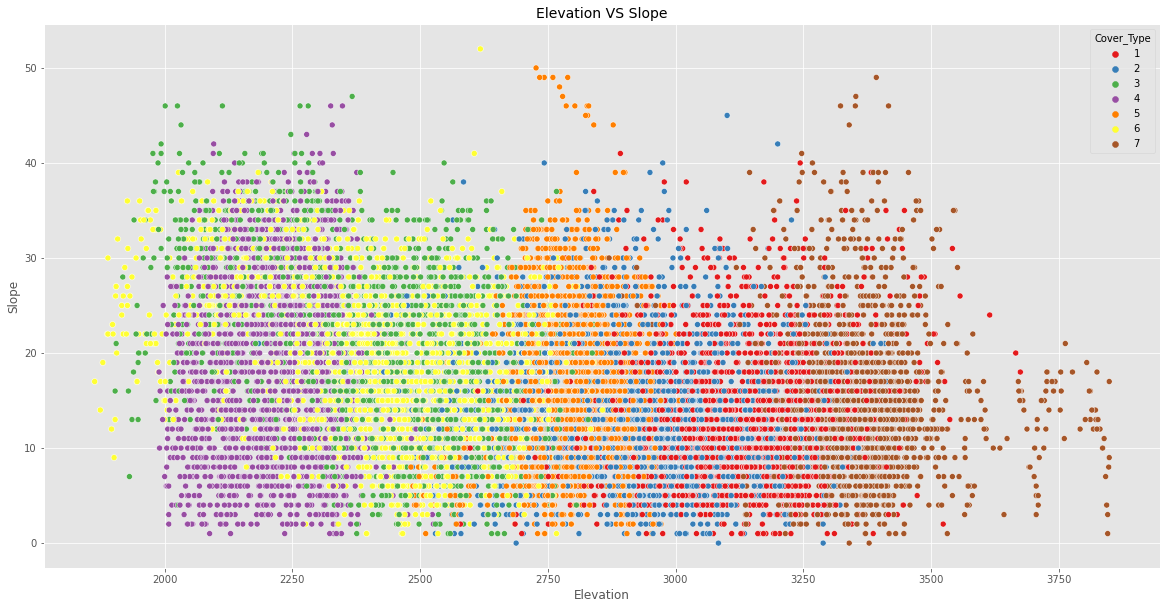

In [ ]:
figsize(20,10)
sns.scatterplot(x="Elevation", y="Slope", 
                hue="Cover_Type", data=df, 
                legend="full", hue_norm=(0,8), palette="Set1")
plt.title("Elevation VS Slope", size=14)

In [ ]:
print('Range of Slope : ', df['Slope'].min(), '-', df['Slope'].max())
print('Range of Elevation : ', df['Elevation'].min(), '-', df['Elevation'].max())

Range of Slope :  0 - 52
Range of Elevation :  1863 - 3849


- The unit of slope given in this case is degrees
- The data range of slope is 0 to 52, which is obvious since we can't have a slope of 90 degrees in any give place (can't grow trees there)
- 0 meaning flat surface

#### Inference
- `Slope` = Slope at a given measuring point in degrees
- `Elevation` = Altitude from sea level in metres

Plotting Scatter plot for `Slope` vs `Elevation`, we can understand that
- Elevation and Slope are key features for predicting the `Cover_Type`
- About `Slope` we can say that, most of our data is concentrated in the 0 - 40 degrees range (0 meaning flat surface)
- About `Elevation` we can say that
    - Between 2000-2300 = we can see majorly `Cover_Type` 4
    - Between 2400-2600 = we can see `Cover_Type` 3
    - AT 2750 = mostly `Cover_Type` 5
- Thus these are important features when predicting the `Cover_Type`

## Relation between various Hill Shades

Text(0.5, 1.0, 'Hillshade_3pm')

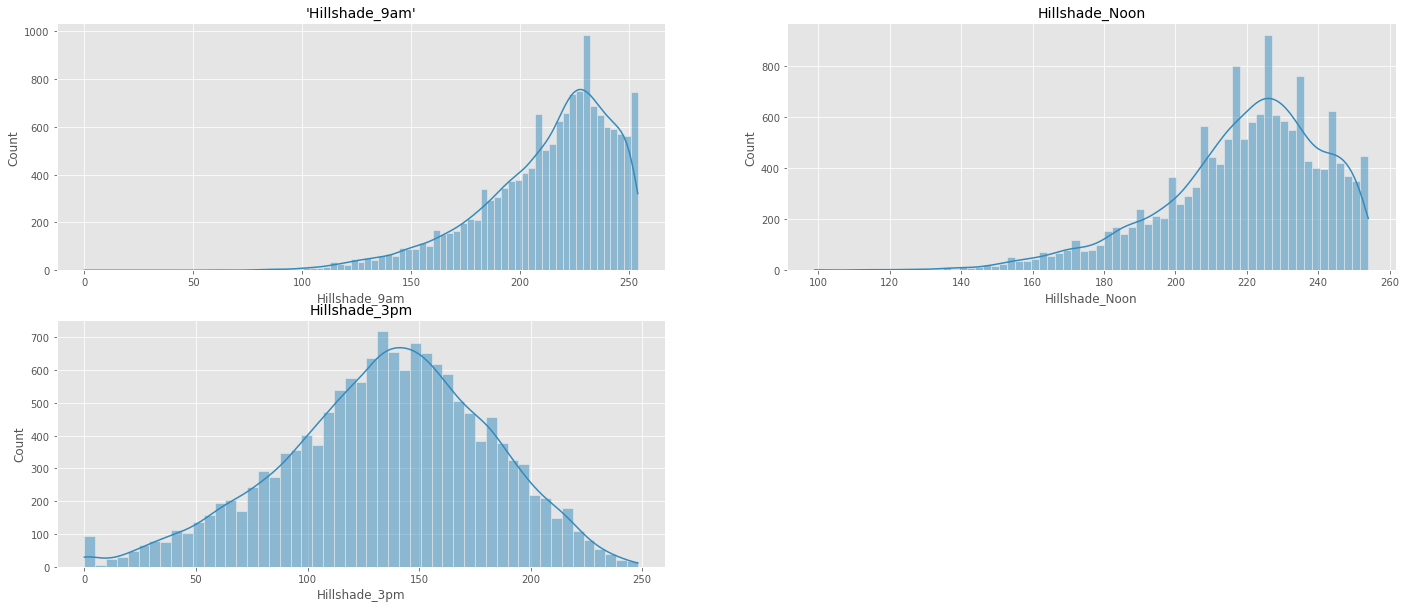

In [ ]:
figsize(24,10)

# plot the first subplot
plt.subplot(2,2,1)
sns.histplot(data=df, x='Hillshade_9am', kde=True)
plt.title("'Hillshade_9am'", size=14)

# plot the second subplot
plt.subplot(2,2,2)
sns.histplot(data=df, x='Hillshade_Noon', kde=True)
plt.title("Hillshade_Noon", size=14)

# plot the third subplot
plt.subplot(2,2,3)
sns.histplot(data=df, x='Hillshade_3pm', kde=True)
plt.title("Hillshade_3pm", size=14)

In [ ]:
print('Range of Hillshade_9am : ', df['Hillshade_9am'].min(), '-', df['Hillshade_9am'].max())
print('Range of Hillshade_Noon : ', df['Hillshade_Noon'].min(), '-', df['Hillshade_Noon'].max())
print('Range of Hillshade_3pm : ', df['Hillshade_3pm'].min(), '-', df['Hillshade_3pm'].max())

Range of Hillshade_9am :  0 - 254
Range of Hillshade_Noon :  99 - 254
Range of Hillshade_3pm :  0 - 248


Attributes taken into comparison are :
- `Hillshade_9am` = Hillshade index b/w 0-255 at 9am
- `Hillshade_Noon` = Hillshade index b/w 0-255 at Noon
- `Hillshade_3pm` = Hillshade index b/w 0-255 at 3pm

Data taken at a point of time, therefore it is not time series data

#### Meaning of Hillshade index
- Hillshading is a technique used to create a realistic view of terrain by creating a three-dimensional surface from a two-dimensional display of it.
- Hillshading creates a hypothetical illumination of a surface by setting a position for a light source and calculating an illumination value for each cell based on the cell's relative orientation to the light, or based on the slope and aspect of the cell.
- <img src='hillshade-index.gif' text-align='center'>
- the value of the hillshade index ranges from 0 to 255, telling us how how illuminated is that point
- here we are checking the illumination for that particular tree at 9am, noon, 3pm
- here 0 is dark and 255 is brightly lit

#### Inference

- we can infer from the density graphs that, over time, the trees receive lesser and lesser sunlight
- with time from 9am(225), Noon(210), 3pm(140), the peak gradually decreases

#### Testing for collinearity
- Collinearity is a linear association between two predictors.
- Multicollinearity is a situation where two or more predictors are highly linearly related. 
    - i.e an absolute correlation coefficient of >0.7 or <-0.7 among two or more predictors indicates the presence of multicollinearity.

In [ ]:
hillShadeCols = df[['Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm']]
hillShadeCols.corr()

Hillshade_9am  Hillshade_Noon  Hillshade_3pm
Hillshade_9am        1.000000       -0.014331      -0.780253
Hillshade_Noon      -0.014331        1.000000       0.614653
Hillshade_3pm       -0.780253        0.614653       1.000000

- From the correlation table, we can infer that Hillshade_3pm vs Hillshade_3pm is -0.77
- Thus Hillshade_3pm and Hillshade_3pm are highly collinear
- Hence one of them can be dropped, let's decide which one to drop

#### Least Significant Hillshade column

Text(0.5, 1.0, 'Pearson Correlation of Hill Shade Features')

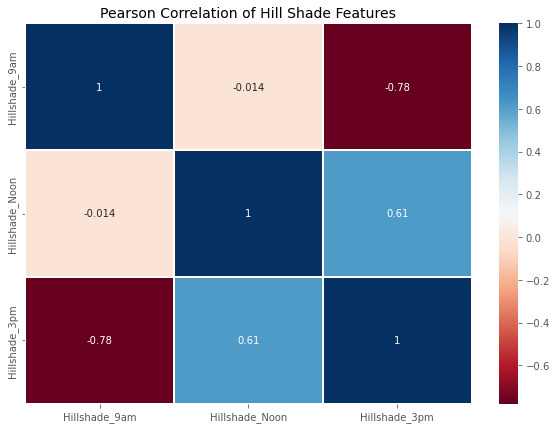

In [ ]:
# figsize=(1,4)
fig, ax = plt.subplots(figsize=(10,7)) 

# plot the heatmap
colormap = plt.cm.RdBu
sns.heatmap(hillShadeCols.corr(),linewidths=0.1, 
            square=False, cmap=colormap, linecolor='white', annot=True)
plt.title('Pearson Correlation of Hill Shade Features', size=14)

- From the Correlation heatmap we can conclude that `HillShade_9pm` is the least sinificant while looking at the correlation with `Cover_Type`
- Thus `HillShade_9pm` can be dropped before we begin to train test the model

## Pearson Coefficient for all features (Checking whether Numeric Soil type has better correlation)

Text(0.5, 1.05, 'Pearson Correlation of All Features')

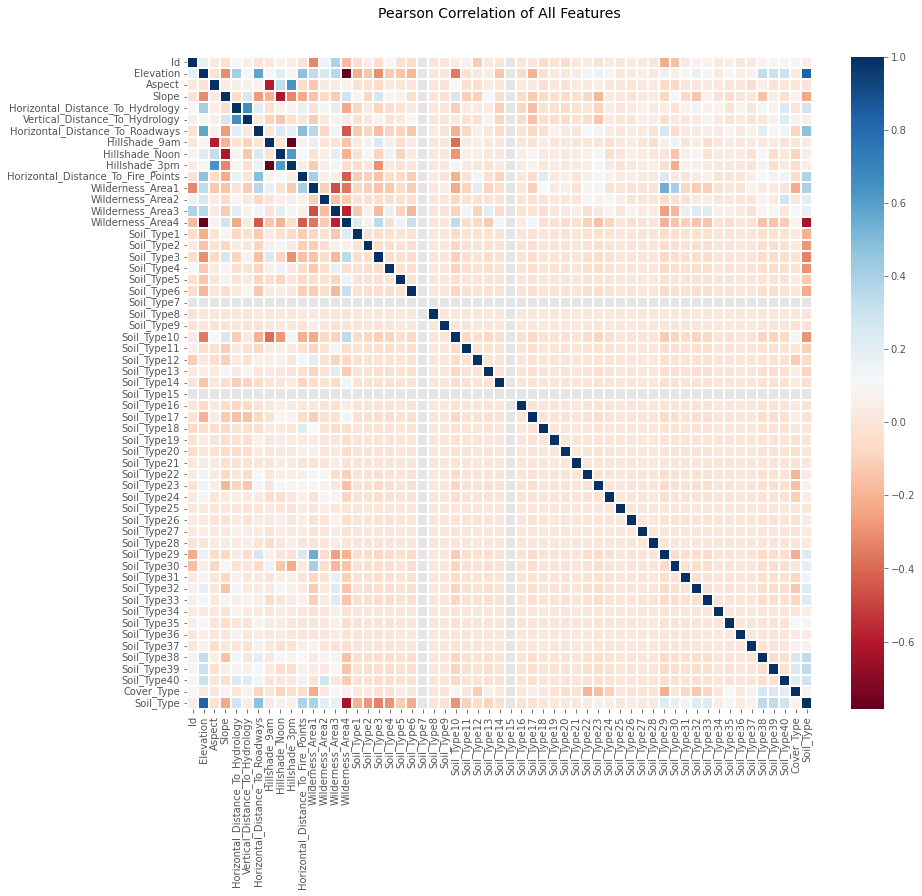

In [ ]:
plt.figure(figsize=(14,12))

# plot heatmap set the title
colormap = plt.cm.RdBu
sns.heatmap(df.corr(),linewidths=0.1,vmax=1.0, 
            square=False, cmap=colormap, linecolor='white', annot=False)
plt.title('Pearson Correlation of All Features', y=1.05, size=14)

#### Inference
- None of the features have a significant effect on deteremining `Cover_Type` (when we look at the last column
- `Soil_Type7` and `Soil_Type15` columns are blank in the heatmap, thus zero effect on determining `Cover_Type`.
- Also approximately only 3 soil types affect the `Cover_Type`, therefore lets check whether it makes a differece if we reverse one hot encoding to get a sigular column with soil types and then check for correlation

## Pearson coefficients with numeric Soil_Type after reverseOneHotEncoding

Text(0.5, 1.0, 'Pearson Correlation of Features with Numeric Soil_Type')

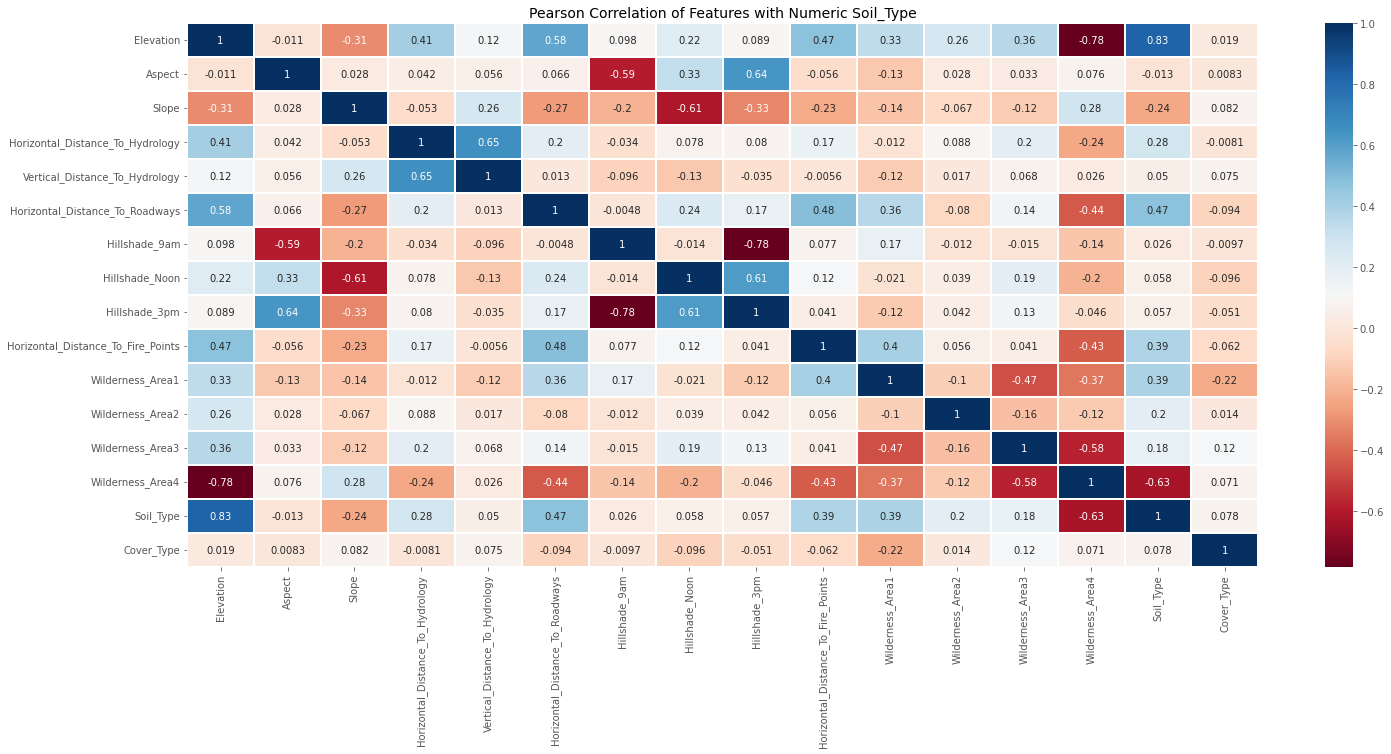

In [ ]:
# make a list of numeric features and create a dataframe with them
df['Wilderness_Area_Type'] = (df.iloc[:, 11:15] == 1).idxmax(1)
wilderness_areas = sorted(df['Wilderness_Area_Type'].value_counts().index.tolist())

all_features_w_label = continuous_variables + wilderness_areas + ["Soil_Type"] + ["Cover_Type"]
trees_w_numeric_soil = df[all_features_w_label]

# pearson coefficients with numeric soil type column
correlations = pd.DataFrame(trees_w_numeric_soil.corr())

figsize=(16,14)

# plot the heatmap
colormap = plt.cm.RdBu
sns.heatmap(correlations,linewidths=0.1, 
            square=False, cmap=colormap, linecolor='white', annot=True)
plt.title('Pearson Correlation of Features with Numeric Soil_Type', size=14)

#### Inference
- Soil Types as it do not have significant correlation with `Cover_Type`
- After reverse-one-hot-encoding Soil types into one numeric soil types column, we are getting better correlation with `Cover_Type`
- Thus it is better to have one numeric soil type column in the training set and one-hot-encoded soil type columns must be excluded/dropped.
- Correlation Range : Numeric soil type column and other variables have pearson coefficients in the range of [-0.2, 0.1].

# Feature Engineering

### *Data cleaning along with removing outliers is performed in the first part of the analysis *

#### Steps:
- Reverse one hot encoding 
- Adding new feature columns 
- Transforming the data
- Testing for accuracy with dummy classifier

## 1. Adding columns

### Reverse one hot encoding for [Soil type]

- Reverse one-hot-encoding is perfomed for 40 columns of soil type inorder to have minimal column set and better value accuracy in the model

In [ ]:
reverse_one_hot_encode(df, 16, 56, "Soil_Type")

In [ ]:
all_features_w_label = continuous_variables + wilderness_areas + ["Soil_Type"] + ["Cover_Type"]
trees_w_numeric_soil = df[all_features_w_label]

In [ ]:
trees_w_numeric_soil

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
11          2886     151     11                               371   
14          2503     157      4                                67   
15          2495      51      7                                42   
17          2517      72      7                                85   
18          2504       0      4                                95   
...          ...     ...    ...                               ...   
15115       2607     243     23                               258   
15116       2603     121     19                               633   
15117       2492     134     25                               365   
15118       2487     167     28                               218   
15119       2475     197     34                               319   

       Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
11                                 26                             5253   
14                                  4                              674   
15                                  2                              752   
17                                  6                              595   
18                                  5                              691   
...                               ...                              ...   
15115                               7                              660   
15116                             195                              618   
15117                             117                              335   
15118                             101                              242   
15119                              78                              270   

       Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
11               234             240            136   
14               224             240            151   
15               224             225            137   
17               228             227            133   
18               214             232            156   
...              ...             ...            ...   
15115            170             251            214   
15116            249             221             91   
15117            250             220             83   
15118            229             237            119   
15119            189             244            164   

       Horizontal_Distance_To_Fire_Points  Wilderness_Area1  Wilderness_Area2  \
11                                   4051                 1                 0   
14                                   5600                 1                 0   
15                                   5576                 1                 0   
17                                   5607                 1                 0   
18                                   5572                 1                 0   
...                                   ...               ...               ...   
15115                                1282                 0                 0   
15116                                1325                 0                 0   
15117                                1187                 0                 0   
15118                                 932                 0                 0   
15119                                 914                 0                 0   

       Wilderness_Area3  Wilderness_Area4  Soil_Type  Cover_Type  
11                    0                 0         30           2  
14                    0                 0         18           5  
15                    0                 0         16           5  
17                    0                 0         18           5  
18                    0                 0         18           5  
...                 ...               ...        ...         ...  
15115                 1                 0          4           3  
15116                 1                 0          4           3  
15117                 1                 0          4

In [ ]:
trees_w_numeric_soil.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type',
       'Cover_Type'],
      dtype='object')

### Reverse one hot encoding [Wilderness area]

- Reverse one-hot-encoding is perfomed for 4 columns of wilderness area for better accuracy

In [ ]:
reverse_one_hot_encode(df, 11, 15, "Wilderness_Area")

In [ ]:
# creating trees with numeric soil and numeric wilderness area
trees_w_numeric_soil_wilderness_labels = all_features_w_label = continuous_variables + ['Wilderness_Area'] + ["Soil_Type"] + ["Cover_Type"]
trees_w_numeric_soil_wilderness = df[trees_w_numeric_soil_wilderness_labels]


In [ ]:
trees_w_numeric_soil_wilderness

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
11          2886     151     11                               371   
14          2503     157      4                                67   
15          2495      51      7                                42   
17          2517      72      7                                85   
18          2504       0      4                                95   
...          ...     ...    ...                               ...   
15115       2607     243     23                               258   
15116       2603     121     19                               633   
15117       2492     134     25                               365   
15118       2487     167     28                               218   
15119       2475     197     34                               319   

       Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
11                                 26                             5253   
14                                  4                              674   
15                                  2                              752   
17                                  6                              595   
18                                  5                              691   
...                               ...                              ...   
15115                               7                              660   
15116                             195                              618   
15117                             117                              335   
15118                             101                              242   
15119                              78                              270   

       Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
11               234             240            136   
14               224             240            151   
15               224             225            137   
17               228             227            133   
18               214             232            156   
...              ...             ...            ...   
15115            170             251            214   
15116            249             221             91   
15117            250             220             83   
15118            229             237            119   
15119            189             244            164   

       Horizontal_Distance_To_Fire_Points  Wilderness_Area  Soil_Type  \
11                                   4051                1         30   
14                                   5600                1         18   
15                                   5576                1         16   
17                                   5607                1         18   
18                                   5572                1         18   
...                                   ...              ...        ...   
15115                                1282                3          4   
15116                                1325                3          4   
15117                                1187                3          4   
15118                                 932                3          4   
15119                                 914                3          2   

       Cover_Type  
11              2  
14              5  
15              5  
17              5  
18              5  
...           ...  
15115           3  
15116           3  
15117           3  
15118           3  
15119           3  

[14988 rows x 13 columns]

In [ ]:
trees_w_numeric_soil_wilderness.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area', 'Soil_Type',
       'Cover_Type'],
      dtype='object')

### Adding extra FEATURE COLUMNS to the one hot encodded Data Frame

- Since we have both horizontal as well as the vertical distance to hydrology from our measuring point, i.e (x,y) from origin (i.e tree)
- We Could make use of the Euclidean Distance as an extra feature to our problem
- <img src='euclid-1.png' width='300px' height='auto'> <img src='euclid-2.svg' width='300px' height='auto300px'>
- `Euclidean Distance` : 
    - Euclidean distance is the ordinary distance between two points in n dimension. (In our case 2d with x and y)
    - It is a distance metric to measure the similarity between observations.
- Therefore adding Euclidean Distance to our model will help in predicting values with more accuracy


- `Numerical Column Grouping`
        - Numerical columns are grouped using sum and mean functions in most of the cases. Both can be preferable according to the meaning of the feature. 

##### POINTS
- The numerical values which imply silimar features are clubed together by extracting the `Mean` of the value
- Inorder to extract feature columns `Domain Knowledge` is required

#### Important feature

* Elevation and Vertical Distance to Hydrology
* Horizontal Distance to Hydrology and Horizontal Distance to Firepoints
* Horizontal Distance to Hydrology and Horizontal Distance to Roadways 
* Horizontal Distance to Firepoints and Horizontal Distance to Roadways
* Euclidian Distance of Horizontal Distance to Hydrology and Vertical Distance to Hydrology



##### Features are named as:
- Euclidian_Distance_To_Hydrology
- Mean_Elevation_Vertical_Distance_Hydrology
- Mean_Distance_Hydrology_Firepoints
- Mean_Distance_Hydrology_Roadways
- Mean_Distance_Firepoints_Roadways

In [ ]:
# add columns
trees_w_numeric_soil_feature = df[all_features_w_label]
trees_w_numeric_soil_feature['Euclidian_Distance_To_Hydrology'] = (trees_w_numeric_soil['Horizontal_Distance_To_Hydrology']**2 + 
                                                           trees_w_numeric_soil['Vertical_Distance_To_Hydrology']**2)**0.5
trees_w_numeric_soil_feature['Mean_Elevation_Vertical_Distance_Hydrology'] = (trees_w_numeric_soil['Elevation'] + 
                                                                      trees_w_numeric_soil['Vertical_Distance_To_Hydrology'])/2
trees_w_numeric_soil_feature['Mean_Distance_Hydrology_Firepoints'] = (trees_w_numeric_soil['Horizontal_Distance_To_Hydrology'] + 
                                                              trees_w_numeric_soil['Horizontal_Distance_To_Fire_Points'])/2
trees_w_numeric_soil_feature['Mean_Distance_Hydrology_Roadways'] = (trees_w_numeric_soil['Horizontal_Distance_To_Hydrology'] + 
                                                            trees_w_numeric_soil['Horizontal_Distance_To_Roadways'])/2
trees_w_numeric_soil_feature['Mean_Distance_Firepoints_Roadways'] = (trees_w_numeric_soil['Horizontal_Distance_To_Fire_Points'] + 
                                                             trees_w_numeric_soil['Horizontal_Distance_To_Roadways'])/2

In [ ]:
trees_w_numeric_soil_feature

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
11          2886     151     11                               371   
14          2503     157      4                                67   
15          2495      51      7                                42   
17          2517      72      7                                85   
18          2504       0      4                                95   
...          ...     ...    ...                               ...   
15115       2607     243     23                               258   
15116       2603     121     19                               633   
15117       2492     134     25                               365   
15118       2487     167     28                               218   
15119       2475     197     34                               319   

       Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
11                                 26                             5253   
14                                  4                              674   
15                                  2                              752   
17                                  6                              595   
18                                  5                              691   
...                               ...                              ...   
15115                               7                              660   
15116                             195                              618   
15117                             117                              335   
15118                             101                              242   
15119                              78                              270   

       Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
11               234             240            136   
14               224             240            151   
15               224             225            137   
17               228             227            133   
18               214             232            156   
...              ...             ...            ...   
15115            170             251            214   
15116            249             221             91   
15117            250             220             83   
15118            229             237            119   
15119            189             244            164   

       Horizontal_Distance_To_Fire_Points  Wilderness_Area  Soil_Type  \
11                                   4051                1         30   
14                                   5600                1         18   
15                                   5576                1         16   
17                                   5607                1         18   
18                                   5572                1         18   
...                                   ...              ...        ...   
15115                                1282                3          4   
15116                                1325                3          4   
15117                                1187                3          4   
15118                                 932                3          4   
15119                                 914                3          2   

       Cover_Type  Euclidian_Distance_To_Hydrology  \
11              2                       371.909935   
14              5                        67.119297   
15              5                        42.047592   
17              5                        85.211502   
18              5                        95.131488   
...           ...                              ...   
15115           3                       258.094944   
15116           3                       662.354890   
15117           3                       383.293621   
15118           3                       240.260276   
15119           3                       328.397625   

       Mean_Elevation_Vertical_Distance_Hydrology  \
11                                         1456.0

In [ ]:
trees_w_numeric_soil_feature.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area', 'Soil_Type',
       'Cover_Type', 'Euclidian_Distance_To_Hydrology',
       'Mean_Elevation_Vertical_Distance_Hydrology',
       'Mean_Distance_Hydrology_Firepoints',
       'Mean_Distance_Hydrology_Roadways',
       'Mean_Distance_Firepoints_Roadways'],
      dtype='object')

## 2. Tranforming the data 

#### Inference
- Tranformation is performed when dataset imbalanced and skewed 
- From the histogram given below it can be infered that may columns in the dataset is skewed

array([[<AxesSubplot:title={'center':'Elevation'}>,
        <AxesSubplot:title={'center':'Aspect'}>,
        <AxesSubplot:title={'center':'Slope'}>,
        <AxesSubplot:title={'center':'Horizontal_Distance_To_Hydrology'}>],
       [<AxesSubplot:title={'center':'Vertical_Distance_To_Hydrology'}>,
        <AxesSubplot:title={'center':'Horizontal_Distance_To_Roadways'}>,
        <AxesSubplot:title={'center':'Hillshade_9am'}>,
        <AxesSubplot:title={'center':'Hillshade_Noon'}>],
       [<AxesSubplot:title={'center':'Hillshade_3pm'}>,
        <AxesSubplot:title={'center':'Horizontal_Distance_To_Fire_Points'}>,
        <AxesSubplot:title={'center':'Wilderness_Area'}>,
        <AxesSubplot:title={'center':'Soil_Type'}>],
       [<AxesSubplot:title={'center':'Cover_Type'}>,
        <AxesSubplot:title={'center':'Euclidian_Distance_To_Hydrology'}>,
        <AxesSubplot:title={'center':'Mean_Elevation_Vertical_Distance_Hydrology'}>,
        <AxesSubplot:title={'center':'Mean_Distance_Hydrol

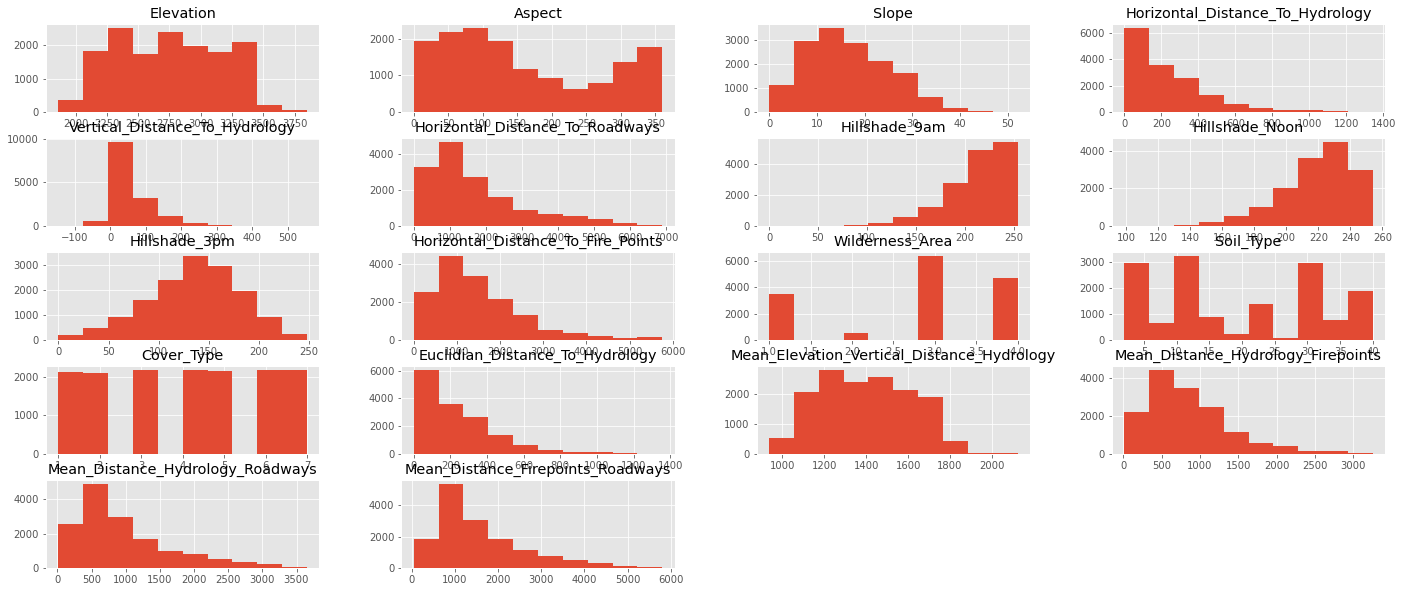

In [ ]:
trees_w_numeric_soil_feature.hist()

### Checking for Skewness

In [ ]:
df.iloc[:,:10].skew()

Id                                  0.001793
Elevation                           0.080969
Aspect                              0.449970
Slope                               0.519378
Horizontal_Distance_To_Hydrology    1.489508
Vertical_Distance_To_Hydrology      1.532539
Horizontal_Distance_To_Roadways     1.264922
Hillshade_9am                      -1.090094
Hillshade_Noon                     -0.946938
Hillshade_3pm                      -0.336696
dtype: float64

### * Inorder to remove the skewness and balance the dataset to get better accuracy Transformation is performed *

### Comparing tranformatinos using Dataframe without Features added (SQRT vs LOG)

### Square Root Data tranformation [ Without features ]

- `SQRT` tranformatoin is perfoemed when the data is `left-skewed`

In [ ]:
# add sqrt transformed columns to the trees_w_numeric_soil dataframe
trees_w_numeric_soil_sqrt = trees_w_numeric_soil
for col in trees_w_numeric_soil_sqrt.columns:
    if trees_w_numeric_soil_sqrt[col].min() >= 0:
        if col == 'Cover_Type':
            next
        else:
            trees_w_numeric_soil_sqrt['Sqrt_' + col] = np.sqrt(trees_w_numeric_soil_sqrt[col])# add sqrt transformed columns to the trees_w_numeric_soil dataframe

In [ ]:
trees_w_numeric_soil_sqrt.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type',
       'Cover_Type', 'Sqrt_Elevation', 'Sqrt_Aspect', 'Sqrt_Slope',
       'Sqrt_Horizontal_Distance_To_Hydrology',
       'Sqrt_Horizontal_Distance_To_Roadways', 'Sqrt_Hillshade_9am',
       'Sqrt_Hillshade_Noon', 'Sqrt_Hillshade_3pm',
       'Sqrt_Horizontal_Distance_To_Fire_Points', 'Sqrt_Wilderness_Area1',
       'Sqrt_Wilderness_Area2', 'Sqrt_Wilderness_Area3',
       'Sqrt_Wilderness_Area4', 'Sqrt_Soil_Type'],
      dtype='object')

#### Correlation Table for Square root Data tranformation [ Without Features ]

In [ ]:
correlations_transformed_soil_sqrt = pd.DataFrame(trees_w_numeric_soil_sqrt.corr())
correlations_transformed_soil_sqrt = pd.DataFrame(correlations_transformed_soil_sqrt["Cover_Type"]).reset_index()

# format, and display sorted correlations_transformed
correlations_transformed_soil_sqrt.columns = ["Feature", "Correlation with Cover_Type"]
correlations_transformed_soil_sqrt = (correlations_transformed_soil_sqrt[correlations_transformed_soil_sqrt["Feature"] != "Cover_Type"]
                .sort_values(by="Correlation with Cover_Type", ascending=True))
display(correlations_transformed_soil_sqrt)

Feature  Correlation with Cover_Type
10                         Wilderness_Area1                    -0.220713
25                    Sqrt_Wilderness_Area1                    -0.220713
7                            Hillshade_Noon                    -0.095848
22                      Sqrt_Hillshade_Noon                    -0.095399
5           Horizontal_Distance_To_Roadways                    -0.094212
20     Sqrt_Horizontal_Distance_To_Roadways                    -0.076923
9        Horizontal_Distance_To_Fire_Points                    -0.062142
23                       Sqrt_Hillshade_3pm                    -0.055879
24  Sqrt_Horizontal_Distance_To_Fire_Points                    -0.052415
8                             Hillshade_3pm                    -0.051264
19    Sqrt_Horizontal_Distance_To_Hydrology                    -0.031956
21                       Sqrt_Hillshade_9am                    -0.009947
6                             Hillshade_9am                    -0.009710
3          Horizontal_Distance_To_Hydrology                    -0.008078
17                              Sqrt_Aspect                     0.002521
1                                    Aspect                     0.008252
16                           Sqrt_Elevation                     0.010092
26                    Sqrt_Wilderness_Area2                     0.013653
11                         Wilderness_Area2                     0.013653
0                                 Elevation                     0.019360
29                           Sqrt_Soil_Type                     0.041498
28                    Sqrt_Wilderness_Area4                     0.071171
13                         Wilderness_Area4                     0.071171
4            Vertical_Distance_To_Hydrology                     0.074566
14                                Soil_Type                     0.078400
2                                     Slope                     0.081715
18                               Sqrt_Slope                     0.086921
12                         Wilderness_Area3                     0.116628
27                    Sqrt_Wilderness_Area3                     0.116628

### Log Data tranformation [ Without features ]

In [ ]:
trees_w_numeric_soil_log=df[all_features_w_label]
for col in trees_w_numeric_soil_log.columns:
    if trees_w_numeric_soil_log[col].min() >= 0:
        if col == 'Cover_Type':
            next
        else:
            trees_w_numeric_soil_log['log' + col] = np.sqrt(trees_w_numeric_soil_log[col])

In [ ]:
trees_w_numeric_soil_log.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area', 'Soil_Type',
       'Cover_Type', 'logElevation', 'logAspect', 'logSlope',
       'logHorizontal_Distance_To_Hydrology',
       'logHorizontal_Distance_To_Roadways', 'logHillshade_9am',
       'logHillshade_Noon', 'logHillshade_3pm',
       'logHorizontal_Distance_To_Fire_Points', 'logWilderness_Area',
       'logSoil_Type'],
      dtype='object')

#### Correlation Table for Log Data tranformation [ Without Features ]

In [ ]:
correlations_transformed_soil_log = pd.DataFrame(trees_w_numeric_soil_log.corr())
correlations_transformed_soil_log = pd.DataFrame(correlations_transformed_soil_log["Cover_Type"]).reset_index()

correlations_transformed_soil_log.columns = ["Feature", "Correlation with Cover_Type"]
correlations_transformed_soil_log = (correlations_transformed_soil_log[correlations_transformed_soil_log["Feature"] != "Cover_Type"]
              .sort_values(by="Correlation with Cover_Type", ascending=True))
display(correlations_transformed_soil_log)

Feature  Correlation with Cover_Type
7                          Hillshade_Noon                    -0.095848
19                      logHillshade_Noon                    -0.095399
5         Horizontal_Distance_To_Roadways                    -0.094212
17     logHorizontal_Distance_To_Roadways                    -0.076923
9      Horizontal_Distance_To_Fire_Points                    -0.062142
20                       logHillshade_3pm                    -0.055879
21  logHorizontal_Distance_To_Fire_Points                    -0.052415
8                           Hillshade_3pm                    -0.051264
16    logHorizontal_Distance_To_Hydrology                    -0.031956
18                       logHillshade_9am                    -0.009947
6                           Hillshade_9am                    -0.009710
3        Horizontal_Distance_To_Hydrology                    -0.008078
14                              logAspect                     0.002521
1                                  Aspect                     0.008252
13                           logElevation                     0.010092
0                               Elevation                     0.019360
23                           logSoil_Type                     0.041498
4          Vertical_Distance_To_Hydrology                     0.074566
11                              Soil_Type                     0.078400
2                                   Slope                     0.081715
15                               logSlope                     0.086921
10                        Wilderness_Area                     0.194833
22                     logWilderness_Area                     0.203303

### Transforming Dataframe with Freatures Added [ SQRT ]

In [ ]:
trees_w_numeric_soil_feature_sqrt = trees_w_numeric_soil_feature
for col in trees_w_numeric_soil_feature_sqrt.columns:
    if trees_w_numeric_soil_feature_sqrt[col].min() >= 0:
        if col == 'Cover_Type':
            next
        else:
            trees_w_numeric_soil_feature_sqrt['Sqrt_' + col] = np.sqrt(trees_w_numeric_soil_feature_sqrt[col])# add sqrt transformed columns to the trees_w_numeric_soil dataframe

In [ ]:
trees_w_numeric_soil_feature_sqrt.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area', 'Soil_Type',
       'Cover_Type', 'Euclidian_Distance_To_Hydrology',
       'Mean_Elevation_Vertical_Distance_Hydrology',
       'Mean_Distance_Hydrology_Firepoints',
       'Mean_Distance_Hydrology_Roadways', 'Mean_Distance_Firepoints_Roadways',
       'Sqrt_Elevation', 'Sqrt_Aspect', 'Sqrt_Slope',
       'Sqrt_Horizontal_Distance_To_Hydrology',
       'Sqrt_Horizontal_Distance_To_Roadways', 'Sqrt_Hillshade_9am',
       'Sqrt_Hillshade_Noon', 'Sqrt_Hillshade_3pm',
       'Sqrt_Horizontal_Distance_To_Fire_Points', 'Sqrt_Wilderness_Area',
       'Sqrt_Soil_Type', 'Sqrt_Euclidian_Distance_To_Hydrology',
       'Sqrt_Mean_Elevation_Vertical_Distance_Hydrology',
       'Sqrt_Mean_Distance_Hydrology_Firepoints',
       'S

#### Correlation Table for SQRT Data tranformation using Dataframe with features

In [ ]:
correlations_transformed_soil_feature_sqrt = pd.DataFrame(trees_w_numeric_soil_feature_sqrt.corr())
correlations_transformed_soil_feature_sqrt = pd.DataFrame(correlations_transformed_soil_feature_sqrt["Cover_Type"]).reset_index()

# format, and display sorted correlations_transformed
correlations_transformed_soil_feature_sqrt.columns = ["Feature", "Correlation with Cover_Type"]
correlations_transformed_soil_feature_sqrt = (correlations_transformed_soil_feature_sqrt[correlations_transformed_soil_feature_sqrt["Feature"] != "Cover_Type"]
                .sort_values(by="Correlation with Cover_Type", ascending=True))
display(correlations_transformed_soil_feature_sqrt)

Feature  \
7                                    Hillshade_Noon   
24                              Sqrt_Hillshade_Noon   
5                   Horizontal_Distance_To_Roadways   
17                Mean_Distance_Firepoints_Roadways   
16                 Mean_Distance_Hydrology_Roadways   
33           Sqrt_Mean_Distance_Firepoints_Roadways   
32            Sqrt_Mean_Distance_Hydrology_Roadways   
22             Sqrt_Horizontal_Distance_To_Roadways   
9                Horizontal_Distance_To_Fire_Points   
15               Mean_Distance_Hydrology_Firepoints   
25                               Sqrt_Hillshade_3pm   
31          Sqrt_Mean_Distance_Hydrology_Firepoints   
26          Sqrt_Horizontal_Distance_To_Fire_Points   
8                                     Hillshade_3pm   
21            Sqrt_Horizontal_Distance_To_Hydrology   
29             Sqrt_Euclidian_Distance_To_Hydrology   
23                               Sqrt_Hillshade_9am   
6                                     Hillshade_9am   
3                  Horizontal_Distance_To_Hydrology   
13                  Euclidian_Distance_To_Hydrology   
19                                      Sqrt_Aspect   
1                                            Aspect   
18                                   Sqrt_Elevation   
30  Sqrt_Mean_Elevation_Vertical_Distance_Hydrology   
0                                         Elevation   
14       Mean_Elevation_Vertical_Distance_Hydrology   
28                                   Sqrt_Soil_Type   
4                    Vertical_Distance_To_Hydrology   
11                                        Soil_Type   
2                                             Slope   
20                                       Sqrt_Slope   
10                                  Wilderness_Area   
27                             Sqrt_Wilderness_Area   

    Correlation with Cover_Type  
7                     -0.095848  
24                    -0.095399  
5                     -0.094212  
17                    -0.092875  
16                    -0.091495  
33                    -0.089852  
32                    -0.080075  
22                    -0.076923  
9                     -0.062142  
15                    -0.060509  
25                    -0.055879  
31                    -0.054423  
26                    -0.052415  
8                     -0.051264  
21                    -0.031956  
29                    -0.027739  
23                    -0.009947  
6                     -0.009710  
3                     -0.008078  
13                    -0.003281  
19                     0.002521  
1                      0.008252  
18                     0.010092  
30                     0.019139  
0                      0.019360  
14                     0.029451  
28                     0.041498  
4                      0.074566  
11                     0.078400  
2                      0.081715  
20                     0.086921  
10                     0.194833  
27                     0.203303

### Inference
So, in addition to the existing features, final features will be:
* Instead of `Horizontal_Distance_To_Hydrology`, `Sqrt Horizontal_Distance_To_Hydrology`
* `Sqrt_Mean_Distance_Hydrology_Roadways`
* `Sqrt_Euclidian_Distance_To_Hydrology`
* `Mean_Elevation_Vertical_Distance_Hydrology`
* `Mean_Distance_Firepoints_Roadways`
* `Mean_Distance_Hydrology_Firepoints`

Additionally, `Hillshade_9am` column since it is strongly correlated with `Hillshadde_3pm`

## 3. Accuracy Testing

### Testing for accuracy with Feature Column

- Feature Added

In [ ]:
# final list of features
transformed_features = ['Sqrt_Horizontal_Distance_To_Hydrology', 'Sqrt_Mean_Distance_Hydrology_Roadways', 'Sqrt_Euclidian_Distance_To_Hydrology', 
                        'Mean_Elevation_Vertical_Distance_Hydrology', 'Mean_Distance_Firepoints_Roadways', 'Mean_Distance_Hydrology_Firepoints',  ]


- `Hillshade_Noon` is dropped 

In [ ]:
all_features =  (['Elevation', 'Aspect', 'Slope', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 
                  'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points' ] + ['Wilderness_Area'] +
                 ['Soil_Type'] + transformed_features)

In [ ]:
trees_training1 = trees_w_numeric_soil_feature_sqrt[all_features]
labels_training = trees_w_numeric_soil_feature_sqrt["Cover_Type"].to_numpy() 

### Main Training

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(trees_training1, labels_training, test_size=0.2, random_state=1) # main

### Dummy Classifier

- It is used only as a <b>simple baseline</b> for the other classifiers i.e. any other classifier is expected to perform better on the given dataset.

In [ ]:
from sklearn.dummy import DummyClassifier

In [ ]:
dummy = DummyClassifier(strategy='stratified', random_state=1)

# train the model
dummy.fit(X_train, y_train)

# Get accuracy score
baseline_accuracy = dummy.score(X_valid, y_valid)
print("Our Dummy algorithm classified {:0.2f} of the of the trees correctly".format(baseline_accuracy))

Our Dummy algorithm classified 0.14 of the of the trees correctly


# Base Models

In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
# create scaler
scaler = StandardScaler()

# apply normalization to training set and transform training set
X_train_scaled = scaler.fit_transform(X_train, y_train)

# transform validation set
X_valid_scaled = scaler.transform(X_valid)

StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance. Unit variance means dividing all the values by the standard deviation.

In [ ]:
def fit_evaluate_model(model, X_train, y_train, X_valid, Y_valid):
    model.fit(X_train, y_train)
    y_predicted = model.predict(X_valid)
    return accuracy_score(y_valid, y_predicted)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=1)
knn_accuracy = fit_evaluate_model(knn_classifier, X_train_scaled, y_train, X_valid_scaled, y_valid)
print("Number of correct predictions made out of all predictions are:", knn_accuracy)

Number of correct predictions made out of all predictions are: 0.818545697131421


In [ ]:
trees_test = pd.read_csv("main-train.csv")

In [ ]:
reverse_one_hot_encode(trees_test, 16, 56, "Soil_Type")

In [ ]:
reverse_one_hot_encode(trees_test, 11, 16, "Wilderness_Area")

In [ ]:
# add linear combinations of columns
trees_test['Euclidian_Distance_To_Hydrology'] = (trees_test['Horizontal_Distance_To_Hydrology']**2 + 
                                                 trees_test['Vertical_Distance_To_Hydrology']**2)**0.5
trees_test['Mean_Elevation_Vertical_Distance_Hydrology'] = (trees_test['Elevation'] + 
                                                            trees_test['Vertical_Distance_To_Hydrology'])/2
trees_test['Mean_Distance_Hydrology_Firepoints'] = (trees_test['Horizontal_Distance_To_Hydrology'] + 
                                                    trees_test['Horizontal_Distance_To_Fire_Points'])/2
trees_test['Mean_Distance_Hydrology_Roadways'] = (trees_test['Horizontal_Distance_To_Hydrology'] + 
                                                  trees_test['Horizontal_Distance_To_Roadways'])/2
trees_test['Mean_Distance_Firepoints_Roadways'] = (trees_test['Horizontal_Distance_To_Fire_Points'] + 
                                                   trees_test['Horizontal_Distance_To_Roadways'])/2

In [ ]:
# transfrom columns 
trees_test['Sqrt_' + 'Horizontal_Distance_To_Hydrology'] = np.sqrt(trees_test['Horizontal_Distance_To_Hydrology'])
trees_test['Sqrt_' + 'Mean_Distance_Hydrology_Roadways'] = np.sqrt(trees_test['Mean_Distance_Hydrology_Roadways'])
trees_test['Sqrt_' + 'Euclidian_Distance_To_Hydrology'] = np.sqrt(trees_test['Euclidian_Distance_To_Hydrology'])

In [ ]:
# add sqrt transformed columns to the trees_w_numeric_soil dataframe
for col in trees_test.columns:
    if trees_test[col].min() >= 0:
        if col == 'Cover_Type':
            next
        else:
            trees_test['sqrt' + col] = np.sqrt(trees_test[col])

In [ ]:
trees_training1 = trees_test[all_features]
labels_training1 = trees_test["Cover_Type"].values

In [ ]:
Xx_train, Xx_valid, yy_train, yy_valid = train_test_split(trees_training1, labels_training1, test_size=0.2, random_state=1)

In [ ]:
len(labels_training1)

15120

In [ ]:
X_test = trees_test[all_features]
print(len(X_test.columns))

16


In [ ]:
test_predictions = knn_classifier.predict(X_test.values)

In [ ]:
output = pd.DataFrame({'Id': trees_test["Id"],
                       'Cover_Type': test_predictions})
output.to_csv('submission.csv', index=False)

In [ ]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

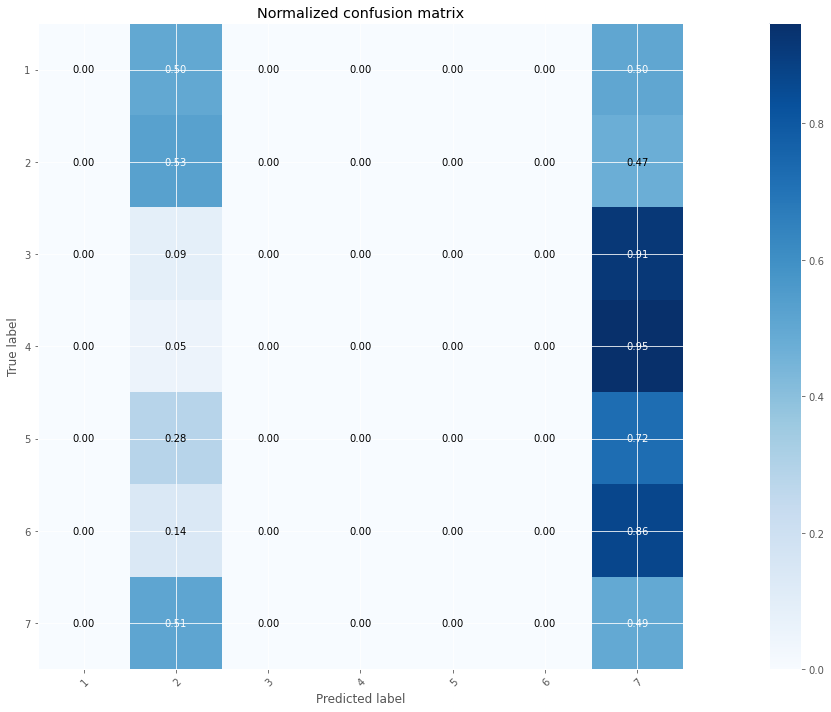

In [ ]:
cover_types = sorted(df['Cover_Type'].value_counts().index.tolist())
plot_confusion_matrix(labels_training1, test_predictions, classes=cover_types, normalize=True,
                      title='Normalized confusion matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(labels_training1, test_predictions)
print('Confusion Matrix:')
print(result)
result1 = classification_report(labels_training1, test_predictions)
print('Classification Report:',)
print (result1)
result2 = accuracy_score(labels_training1, test_predictions)
print('Accuracy:',result2)

Confusion Matrix:
[[   0 1070    0    0    0    0 1090]
 [   0 1141    0    0    0    0 1019]
 [   0  185    0    0    0    0 1975]
 [   0  116    0    0    0    0 2044]
 [   0  603    0    0    0    0 1557]
 [   0  292    0    0    0    0 1868]
 [   0 1096    0    0    0    0 1064]]
Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      2160
           2       0.25      0.53      0.34      2160
           3       0.00      0.00      0.00      2160
           4       0.00      0.00      0.00      2160
           5       0.00      0.00      0.00      2160
           6       0.00      0.00      0.00      2160
           7       0.10      0.49      0.17      2160

    accuracy                           0.15     15120
   macro avg       0.05      0.15      0.07     15120
weighted avg       0.05      0.15      0.07     15120

Accuracy: 0.14583333333333334


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
clf = DecisionTreeClassifier(random_state=42)

In [ ]:
clf = clf.fit(X_train, y_train)

In [ ]:
dtree = DecisionTreeClassifier( random_state=42)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
predictions = dtree.predict(X_test)

In [ ]:
print ("Decision Tree Train Accuracy:", metrics.accuracy_score(y_train, dtree.predict(X_train)))
print ("Decision Tree Test Accuracy:", metrics.accuracy_score(labels_training1, dtree.predict(X_test)))

Decision Tree Train Accuracy: 1.0
Decision Tree Test Accuracy: 0.9519179894179894


In [ ]:
y_pred = dtree.predict(X_test)
print('Accuracy of decision tree classifier on test set: {:.2f}'.format(dtree.score(X_test, labels_training1)))

Accuracy of decision tree classifier on test set: 0.95


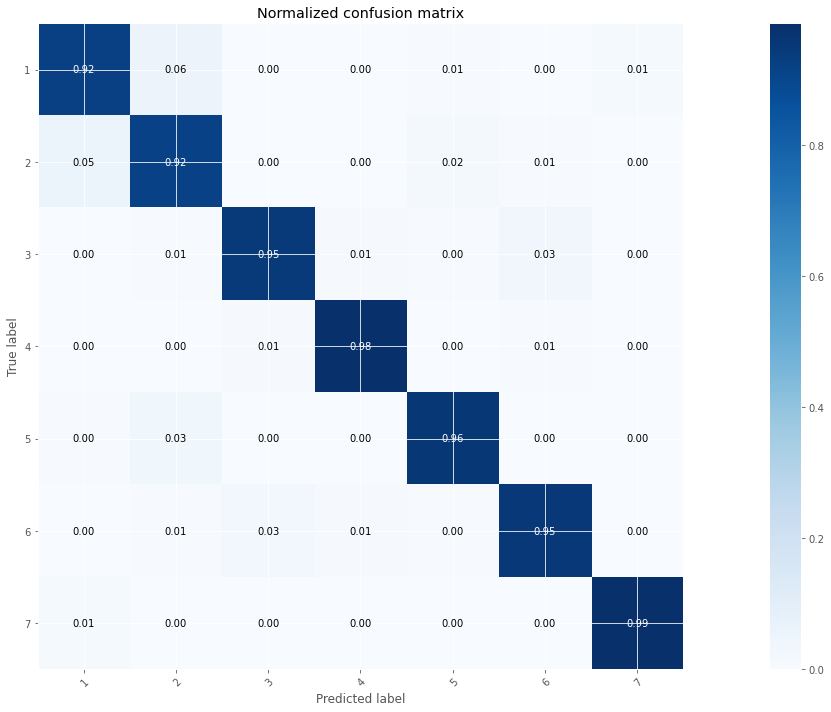

In [ ]:
plot_confusion_matrix(labels_training1, y_pred, classes=cover_types, normalize=True,
                      title='Normalized confusion matrix')
plt.show()

In [ ]:
result = confusion_matrix(labels_training1, y_pred)
print('Confusion Matrix:')
print(result)
result1 = classification_report(labels_training1, y_pred)
print('Classification Report:',)
print (result1)
result2 = accuracy_score(labels_training1, y_pred)
print('Accuracy:',result2)

Confusion Matrix:
[[1990  123    1    0   11    5   30]
 [ 116 1984    6    0   36   12    6]
 [   0   12 2047   20    9   71    1]
 [   0    0   18 2127    0   15    0]
 [   9   75    8    0 2063    5    0]
 [   2   12   66   17    9 2054    0]
 [  25    7    0    0    0    0 2128]]
Classification Report:
              precision    recall  f1-score   support

           1       0.93      0.92      0.93      2160
           2       0.90      0.92      0.91      2160
           3       0.95      0.95      0.95      2160
           4       0.98      0.98      0.98      2160
           5       0.97      0.96      0.96      2160
           6       0.95      0.95      0.95      2160
           7       0.98      0.99      0.98      2160

    accuracy                           0.95     15120
   macro avg       0.95      0.95      0.95     15120
weighted avg       0.95      0.95      0.95     15120

Accuracy: 0.9519179894179894


In [ ]:
#end

# Base Models compiled

In [ ]:
# basic imports

import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
from numpy import mean

from sklearn import metrics
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split

# import matplotlib.pyplt as plt


In [ ]:
kfold3 = model_selection.KFold(n_splits = 3)
kfold4 = model_selection.KFold(n_splits = 4)
kfold5 = model_selection.KFold(n_splits = 5)

In [ ]:
# function to train a given model, generate predictions, and return accuracy score
def fit_evaluate_model(model, X_train, y_train, X_valid, Y_valid):
    model.fit(X_train, y_train)
    y_predicted = model.predict(X_valid)
    # return accuracy_score(y_valid, y_predicted) # so that we can calulate every other score as well
    return y_predicted

In [ ]:
# X_cross = df[columns = all_features]
# X_cross = df.iloc[:, [all_features]]
# trees_training1
# labels_training

### 1. K-Nearest Neighbor Classifier

In [ ]:
# create model apply fit_evaluate_model
knn_classifier = KNeighborsClassifier()
y_pred_knn = fit_evaluate_model(knn_classifier, X_train_scaled, y_train, X_valid_scaled, y_valid)
# print("Number of correct predictions made out of all predictions are:", knn_accuracy)
y_pred_knn

array([2, 3, 5, ..., 6, 5, 4], dtype=int64)

In [ ]:
print('Precision: %.3f' % precision_score(y_valid, y_pred_knn, average = 'macro'))
print('Recall: %.3f' % recall_score(y_valid, y_pred_knn, average = 'macro'))
print('Accuracy: %.3f' % accuracy_score(y_valid, y_pred_knn))
print('F1 Score: %.3f' % f1_score(y_valid, y_pred_knn, average = 'macro'))

Precision: 0.795
Recall: 0.800
Accuracy: 0.801
F1 Score: 0.794


In [ ]:
# print(f" Cross-validation score (Accuracy) (splits=3): {cross_val_score(knn_classifier, trees_training1, labels_training, cv = kfold3, scoring='accuracy').mean() * 100} %")

### 2. Light Gradient Boosting Machine (LightGBM) Classifier

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
# create model apply fit_evaluate_model
lgbm_classifier = LGBMClassifier()
y_pred_lgbm = fit_evaluate_model(lgbm_classifier, X_train_scaled, y_train, X_valid_scaled, y_valid)
y_pred_lgbm

array([2, 6, 5, ..., 3, 5, 4], dtype=int64)

In [ ]:
print('Precision: %.3f' % precision_score(y_valid, y_pred_lgbm, average = 'macro'))
print('Recall: %.3f' % recall_score(y_valid, y_pred_lgbm, average = 'macro'))
print('Accuracy: %.3f' % accuracy_score(y_valid, y_pred_lgbm))
print('F1 Score: %.3f' % f1_score(y_valid, y_pred_lgbm, average = 'macro'))

Precision: 0.861
Recall: 0.863
Accuracy: 0.864
F1 Score: 0.861


## 8. Decision Tree

### Decision Tree Classifier with gini criterion index

In [ ]:
#Splitting the dataset into test and train
from sklearn.tree import DecisionTreeClassifier
X = df.drop(['Cover_Type'], axis=1)
y = df['Cover_Type']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [ ]:
dt_gini = DecisionTreeClassifier(criterion='gini')
dt_gini.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_train_gini = dt_gini.predict(X_train)

y_pred_train_gini

array([6, 4, 6, ..., 7, 3, 4])

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 1.0000


In [ ]:
print('Training set score: {:.4f}'.format(dt_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(dt_gini.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.7680


In [ ]:
from sklearn import model_selection
kfold = model_selection.KFold(n_splits = 3)
dt_gini.fit(X_train, y_train)
results = model_selection.cross_val_score(dt_gini, X_train, y_train, cv = kfold)
results.mean()

0.7675515058676586

In [ ]:
from sklearn import model_selection
kfold = model_selection.KFold(n_splits = 5)
dt_gini.fit(X_train, y_train)
results = model_selection.cross_val_score(dt_gini, X_train, y_train, cv = kfold)
results.mean()

0.7844813278008298

In [ ]:
from sklearn import model_selection
kfold = model_selection.KFold(n_splits = 10)
dt_gini.fit(X_train, y_train)
results = model_selection.cross_val_score(dt_gini, X_train, y_train, cv = kfold)
results.mean()

0.7865560165975104

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
params = {'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
grid_search_cv_dt_gini1 = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
grid_search_cv_dt_gini1.fit(X_train, y_train)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15]},
             verbose=1)

In [ ]:
grid_search_cv_dt_gini1.best_estimator_

DecisionTreeClassifier(max_depth=13, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
params = {'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
grid_search_cv_dt_gini2 = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=5)
grid_search_cv_dt_gini2.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15]},
             verbose=1)

In [ ]:
grid_search_cv_dt_gini2.best_estimator_

DecisionTreeClassifier(max_depth=15, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
params = {'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
grid_search_cv_dt_gini3 = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=10)
grid_search_cv_dt_gini3.fit(X_train, y_train)

Fitting 10 folds for each of 15 candidates, totalling 150 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15]},
             verbose=1)

In [ ]:
grid_search_cv_dt_gini3.best_estimator_

DecisionTreeClassifier(max_depth=14, random_state=42)

In [ ]:
dt_gini_big = DecisionTreeClassifier(criterion='gini', max_depth=14, random_state=0)
dt_gini_big.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=14, random_state=0)

In [ ]:
y_pred_gini_big = dt_gini_big.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini_big)))

Model accuracy score with criterion gini index: 0.8002


Comparing the train set and test set to check for underfitting or overfitting

In [ ]:
y_pred_train_gini_big = dt_gini_big.predict(X_train)

y_pred_train_gini_big

array([3, 5, 3, ..., 2, 7, 4])

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini_big)))

Training-set accuracy score: 0.9445


In [ ]:
print('Training set score: {:.4f}'.format(dt_gini_big.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(dt_gini_big.score(X_test, y_test)))

Training set score: 0.9445
Test set score: 0.8002


In [ ]:
 from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_gini_big))

              precision    recall  f1-score   support

           1       0.68      0.68      0.68       419
           2       0.70      0.62      0.66       433
           3       0.75      0.75      0.75       421
           4       0.94      0.94      0.94       453
           5       0.84      0.90      0.87       416
           6       0.75      0.76      0.76       434
           7       0.92      0.95      0.93       437

    accuracy                           0.80      3013
   macro avg       0.80      0.80      0.80      3013
weighted avg       0.80      0.80      0.80      3013



Visualizing the tree

In [ ]:
from six import StringIO
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus 

In [ ]:
inputs = df.drop('Cover_Type', axis=1)

In [ ]:
dot_data = StringIO()
export_graphviz(dt_gini_big, out_file=dot_data, filled=True, class_names=['1','2','3','4','5','6','7'], feature_names=inputs.columns)

In [ ]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

Output hidden; open in https://colab.research.google.com to view.

### Decision Tree Classifier with criterion entropy

In [ ]:
dt_en = DecisionTreeClassifier(criterion='entropy')
dt_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
y_pred_train_en = dt_en.predict(X_train)
y_pred_train_en

array([2, 5, 3, ..., 1, 7, 4])

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 1.0000


In [ ]:
print('Training set score: {:.4f}'.format(dt_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(dt_en.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.7965


In [ ]:
from sklearn import model_selection
kfold = model_selection.KFold(n_splits = 3)
dt_en.fit(X_train, y_train)
results = model_selection.cross_val_score(dt_en, X_train, y_train, cv = kfold)
results.mean()

0.7723650663299834

In [ ]:
from sklearn import model_selection
kfold = model_selection.KFold(n_splits = 5)
dt_en.fit(X_train, y_train)
results = model_selection.cross_val_score(dt_en, X_train, y_train, cv = kfold)
results.mean()

0.7780082987551866

In [ ]:
from sklearn import model_selection
kfold = model_selection.KFold(n_splits = 10)
dt_en.fit(X_train, y_train)
results = model_selection.cross_val_score(dt_en, X_train, y_train, cv = kfold)
results.mean()

0.785643153526971

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
params = {'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
grid_search_cv_dt_en1 = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=5)
grid_search_cv_dt_en1.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15]},
             verbose=1)

In [ ]:
grid_search_cv_dt_en1.best_estimator_

DecisionTreeClassifier(max_depth=15, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
params = {'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
grid_search_cv_dt_en2 = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
grid_search_cv_dt_en2.fit(X_train, y_train)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15]},
             verbose=1)

In [ ]:
grid_search_cv_dt_en2.best_estimator_

DecisionTreeClassifier(max_depth=13, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
params = {'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
grid_search_cv_dt_en3 = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=10)
grid_search_cv_dt_en3.fit(X_train, y_train)

Fitting 10 folds for each of 15 candidates, totalling 150 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15]},
             verbose=1)

In [ ]:
grid_search_cv_dt_en3.best_estimator_

DecisionTreeClassifier(max_depth=14, random_state=42)

In [ ]:
dt_en = DecisionTreeClassifier(criterion='entropy', max_depth=14, random_state=0)
dt_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=14, random_state=0)

In [ ]:
y_pred_en = dt_en.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.7846


Comparing the train set and test set to check for underfitting or overfitting

In [ ]:
y_pred_train_en = dt_en.predict(X_train)

y_pred_train_en

array([2, 5, 3, ..., 2, 7, 4])

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.9598


In [ ]:
print('Training set score: {:.4f}'.format(dt_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(dt_en.score(X_test, y_test)))

Training set score: 0.9598
Test set score: 0.7846


In [ ]:
 from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           1       0.66      0.68      0.67       419
           2       0.63      0.57      0.60       433
           3       0.75      0.75      0.75       421
           4       0.92      0.92      0.92       453
           5       0.83      0.88      0.85       416
           6       0.75      0.75      0.75       434
           7       0.92      0.93      0.93       437

    accuracy                           0.78      3013
   macro avg       0.78      0.78      0.78      3013
weighted avg       0.78      0.78      0.78      3013



##Random Forest

### 3. Random Forests Classifier with gini index

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfgini = RandomForestClassifier(criterion='gini',n_estimators=100)
rfgini.fit(X_train, y_train)
y_pred_rfgini = rfgini.predict(X_test)
y_pred_rfgini

array([3, 7, 6, ..., 2, 2, 5])

In [ ]:
print('Test-set accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_rfgini)))

Test-set accuracy score: 0.8772


In [ ]:
y_pred_train_rfgini = rfgini.predict(X_train)

y_pred_train_rfgini

array([2, 5, 3, ..., 1, 7, 4])

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_rfgini)))

Training-set accuracy score: 1.0000


In [ ]:
print('Training set score: {:.4f}'.format(dt_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(dt_gini.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.7999


In [ ]:
from sklearn import model_selection
kfold = model_selection.KFold(n_splits = 3)
rfgini.fit(X_train, y_train)
results = model_selection.cross_val_score(rfgini, X_train, y_train, cv = kfold)
results.mean()

0.8512036411651543

In [ ]:
from sklearn import model_selection
kfold = model_selection.KFold(n_splits = 5)
rfgini.fit(X_train, y_train)
results = model_selection.cross_val_score(rfgini, X_train, y_train, cv = kfold)
results.mean()

0.8595020746887967

In [ ]:
from sklearn import model_selection
kfold = model_selection.KFold(n_splits = 10)
rfgini.fit(X_train, y_train)
results = model_selection.cross_val_score(rfgini, X_train, y_train, cv = kfold)
results.mean()

0.8676348547717844

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
params = {'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
grid_search_cv_rfgini1 = GridSearchCV(RandomForestClassifier(random_state=42), params, verbose=1, cv=3)
grid_search_cv_rfgini1.fit(X_train, y_train)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15]},
             verbose=1)

In [ ]:
grid_search_cv_rfgini1.best_estimator_

DecisionTreeClassifier(max_depth=13, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
params = {'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
grid_search_cv_rfgini2 = GridSearchCV(RandomForestClassifier(random_state=42), params, verbose=1, cv=5)
grid_search_cv_rfgini2.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15]},
             verbose=1)

In [ ]:
grid_search_cv_rfgini2.best_estimator_

DecisionTreeClassifier(max_depth=15, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
params = {'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
grid_search_cv_rfgini3 = GridSearchCV(RandomForestClassifier(random_state=42), params, verbose=1, cv=10)
grid_search_cv_rfgini3.fit(X_train, y_train)

Fitting 10 folds for each of 15 candidates, totalling 150 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15]},
             verbose=1)

In [ ]:
grid_search_cv_rfgini3.best_estimator_

DecisionTreeClassifier(max_depth=14, random_state=42)

In [ ]:
rfgini_new = RandomForestClassifier(criterion='gini', max_depth=14, random_state=0)
rfgini_new.fit(X_train, y_train)

RandomForestClassifier(max_depth=14, random_state=0)

In [ ]:
y_pred_gini_rf = rfgini_new.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini_rf)))

Model accuracy score with criterion gini index: 0.8477


Comparing the train set and test set to check for underfitting or overfitting

In [ ]:
y_pred_train_gini_rf = rfgini_new.predict(X_train)

y_pred_train_gini_rf

array([2, 5, 3, ..., 1, 7, 4])

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini_rf)))

Training-set accuracy score: 0.9598


In [ ]:
print('Training set score: {:.4f}'.format(rfgini_new.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(rfgini_new.score(X_test, y_test)))

Training set score: 0.9598
Test set score: 0.8477


In [ ]:
 from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_gini_rf))

              precision    recall  f1-score   support

           1       0.75      0.76      0.75       419
           2       0.77      0.63      0.70       433
           3       0.84      0.81      0.83       421
           4       0.92      0.96      0.94       453
           5       0.85      0.94      0.89       416
           6       0.85      0.85      0.85       434
           7       0.92      0.97      0.95       437

    accuracy                           0.85      3013
   macro avg       0.84      0.85      0.84      3013
weighted avg       0.84      0.85      0.84      3013



Visualizing the tree

In [ ]:
from six import StringIO
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus 

In [ ]:
inputs = df.drop('Cover_Type', axis=1)

In [ ]:
dot_data = StringIO()
export_graphviz(dt_gini_big, out_file=dot_data, filled=True, class_names=['1','2','3','4','5','6','7'], feature_names=inputs.columns)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.237038 to fit



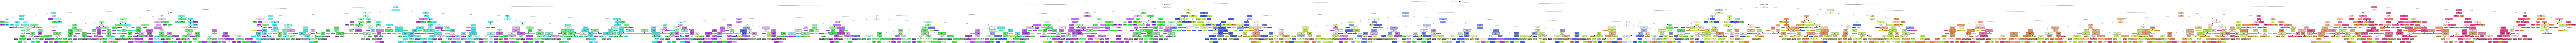

In [ ]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

### Random Forest Classifier with criterion entropy

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfen = RandomForestClassifier(criterion='entropy',n_estimators=100)
rfen.fit(X_train, y_train)
y_pred_rfen = rfen.predict(X_test)
y_pred_rfen

array([3, 7, 6, ..., 2, 2, 5])

In [ ]:
y_pred_train_en_rf = dt_en.predict(X_train)
y_pred_train_en

array([2, 5, 3, ..., 2, 7, 4])

In [ ]:
print('Test-set accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_rfen)))

Test-set accuracy score: 0.8739


In [ ]:
y_pred_train_rfen = rfen.predict(X_train)

y_pred_train_rfen

array([2, 5, 3, ..., 1, 7, 4])

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_rfen)))

Training-set accuracy score: 1.0000


In [ ]:
print('Training set score: {:.4f}'.format(rfen.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(rfen.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.8739


In [ ]:
from sklearn import model_selection
kfold = model_selection.KFold(n_splits = 3)
rfen.fit(X_train, y_train)
results = model_selection.cross_val_score(rfen, X_train, y_train, cv = kfold)
results.mean()

0.8521995951138605

In [ ]:
from sklearn import model_selection
kfold = model_selection.KFold(n_splits = 5)
rfen.fit(X_train, y_train)
results = model_selection.cross_val_score(rfen, X_train, y_train, cv = kfold)
results.mean()

0.8612448132780084

In [ ]:
from sklearn import model_selection
kfold = model_selection.KFold(n_splits = 10)
rfen.fit(X_train, y_train)
results = model_selection.cross_val_score(rfen, X_train, y_train, cv = kfold)
results.mean()

0.8669709543568466

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
params = {'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
grid_search_cv_rfen1 = GridSearchCV(RandomForestClassifier(random_state=42), params, verbose=1, cv=3)
grid_search_cv_rfen1.fit(X_train, y_train)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15]},
             verbose=1)

In [ ]:
grid_search_cv_rfen1.best_estimator_

RandomForestClassifier(max_depth=15, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
params = {'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
grid_search_cv_rfen2 = GridSearchCV(RandomForestClassifier(random_state=42), params, verbose=1, cv=5)
grid_search_cv_rfen2.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15]},
             verbose=1)

In [ ]:
grid_search_cv_rfen2.best_estimator_

RandomForestClassifier(max_depth=15, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
params = {'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
grid_search_cv_rfen3 = GridSearchCV(RandomForestClassifier(random_state=42), params, verbose=1, cv=10)
grid_search_cv_rfen3.fit(X_train, y_train)

Fitting 10 folds for each of 15 candidates, totalling 150 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15]},
             verbose=1)

In [ ]:
grid_search_cv_rfen3.best_estimator_

RandomForestClassifier(max_depth=15, random_state=42)

In [ ]:
rfen_new = RandomForestClassifier(criterion='entropy', max_depth=14, random_state=0)
rfen_new.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=14, random_state=0)

In [ ]:
y_pred_en_rf = rfen_new.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en_rf)))

Model accuracy score with criterion gini index: 0.8477


Comparing the train set and test set to check for underfitting or overfitting

In [ ]:
y_pred_train_en_rf = rfen_new.predict(X_train)

y_pred_train_en_rf

array([2, 5, 3, ..., 1, 7, 4])

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en_rf)))

Training-set accuracy score: 0.9728


In [ ]:
print('Training set score: {:.4f}'.format(rfen_new.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(rfen_new.score(X_test, y_test)))

Training set score: 0.9728
Test set score: 0.8513


In [ ]:
 from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_en_rf))

              precision    recall  f1-score   support

           1       0.75      0.77      0.76       419
           2       0.79      0.63      0.70       433
           3       0.84      0.81      0.83       421
           4       0.93      0.97      0.95       453
           5       0.86      0.94      0.90       416
           6       0.85      0.85      0.85       434
           7       0.92      0.97      0.95       437

    accuracy                           0.85      3013
   macro avg       0.85      0.85      0.85      3013
weighted avg       0.85      0.85      0.85      3013



### 4. Extra Trees (Random Forests) Classifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
# create model apply fit_evaluate_model
xrf_classifier = ExtraTreesClassifier()
y_pred_et = fit_evaluate_model(xrf_classifier, X_train, y_train, X_valid, y_valid)
y_pred_et

array([2, 6, 5, ..., 3, 5, 4], dtype=int64)

In [ ]:
print('Precision: %.3f' % precision_score(y_valid, y_pred_et, average = 'macro'))
print('Recall: %.3f' % recall_score(y_valid, y_pred_et, average = 'macro'))
print('Accuracy: %.3f' % accuracy_score(y_valid, y_pred_et))
print('F1 Score: %.3f' % f1_score(y_valid, y_pred_et, average = 'macro'))

Precision: 0.891
Recall: 0.892
Accuracy: 0.893
F1 Score: 0.891


## 5. Extra Gradient Boosting (XGBoost) Classifier

In [ ]:
from xgboost import XGBClassifier

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [ ]:
# error need to match with a 0 in the set instead of 7
# accepts only properly label encoded data
print(np.unique(y_train)) 
print(np.unique(y_valid))

[1 2 3 4 5 6 7]
[1 2 3 4 5 6 7]


In [ ]:
# xgTable = pd.DataFrame()
y_train_xg = label_encoder.fit_transform(y_train)
y_valid_xg = label_encoder.fit_transform(y_valid)

In [ ]:
print(np.unique(y_train_xg)) 
print(np.unique(y_valid_xg))

[0 1 2 3 4 5 6]
[0 1 2 3 4 5 6]


In [ ]:
# create model apply fit_evaluate_model
xgb_classifier = XGBClassifier()
y_pred_xgb = fit_evaluate_model(xgb_classifier, X_train, y_train_xg, X_valid, y_valid_xg)
# xgb_accuracy = fit_evaluate_model(xgb_classifier, X_train, y_train, X_valid, y_valid)
y_pred_xgb

array([1, 5, 4, ..., 2, 4, 3], dtype=int64)

In [ ]:
print('Precision: %.3f' % precision_score(y_valid_xg, y_pred_xgb, average = 'macro'))
print('Recall: %.3f' % recall_score(y_valid_xg, y_pred_xgb, average = 'macro'))
print('Accuracy: %.3f' % accuracy_score(y_valid_xg, y_pred_xgb))
print('F1 Score: %.3f' % f1_score(y_valid_xg, y_pred_xgb, average = 'macro'))

Precision: 0.853
Recall: 0.856
Accuracy: 0.857
F1 Score: 0.854


## 6. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_reg = LogisticRegression()
y_pred_lr = fit_evaluate_model(log_reg, X_train, y_train, X_valid, y_valid)
y_pred_lr

array([2, 3, 7, ..., 6, 5, 4], dtype=int64)

In [ ]:
print('Precision: %.3f' % precision_score(y_valid, y_pred_lr, average = 'macro'))
print('Recall: %.3f' % recall_score(y_valid, y_pred_lr, average = 'macro'))
print('Accuracy: %.3f' % accuracy_score(y_valid, y_pred_lr))
print('F1 Score: %.3f' % f1_score(y_valid, y_pred_lr, average = 'macro'))

Precision: 0.414
Recall: 0.423
Accuracy: 0.423
F1 Score: 0.417


## 7. Support Vector Machines

In [ ]:
# svc = SVC(kernel='linear', C = 10.0, random_state = 9)
# y_pred_svc = fit_evaluate_model(svc, X_train, y_train, X_valid, y_valid)
# y_pred_svc

In [ ]:
svc = SVC(C=10,kernel='rbf')
y_pred_svc = fit_evaluate_model(svc, X_train, y_train, X_valid, y_valid)
y_pred_svc

array([5, 6, 5, ..., 6, 5, 4], dtype=int64)

In [ ]:
print('Precision: %.3f' % precision_score(y_valid, y_pred_svc, average = 'macro'))
print('Recall: %.3f' % recall_score(y_valid, y_pred_svc, average = 'macro'))
print('Accuracy: %.3f' % accuracy_score(y_valid, y_pred_svc))
print('F1 Score: %.3f' % f1_score(y_valid, y_pred_svc, average = 'macro'))

Precision: 0.670
Recall: 0.676
Accuracy: 0.676
F1 Score: 0.666


## 9. Naive Bayes

In [ ]:
nb = GaussianNB()
y_pred_nb = fit_evaluate_model(nb, X_train, y_train, X_valid, y_valid)
y_pred_nb

array([5, 4, 5, ..., 4, 5, 4], dtype=int64)

In [ ]:
print('Precision: %.3f' % precision_score(y_valid, y_pred_nb, average = 'macro'))
print('Recall: %.3f' % recall_score(y_valid, y_pred_nb, average = 'macro'))
print('Accuracy: %.3f' % accuracy_score(y_valid, y_pred_nb))
print('F1 Score: %.3f' % f1_score(y_valid, y_pred_nb, average = 'macro'))

Precision: 0.587
Recall: 0.591
Accuracy: 0.591
F1 Score: 0.565


# Confusion Matrix Comparison for given models

# Classification Report Comparision for given models

- Accuracy : is the proportion of correct predictions made by a model. It is calculated as the number of correct predictions divided by the total number of predictions. A model with high accuracy is able to make correct predictions most of the time.
- Precision : is the proportion of true positive predictions made by a model. It is calculated as the number of true positive predictions divided by the total number of positive predictions made by the model. A model with high precision is able to identify true positive cases accurately, but it may also have a high number of false negatives.
- Recall : is a evaluation metric that measures the proportion of true positive predictions made by a model. It is calculated as the number of true positive predictions divided by the total number of actual positive cases in the test dataset. A model with high recall is able to identify most of the positive cases in the test dataset.
- F1 score : is a metric that combines precision and recall into a single measure of a model's performance. It is calculated as the harmonic mean of precision and recall, and it ranges from 0 to 1, with higher values indicating better performance.

In [ ]:
evalTable = pd.DataFrame()

evalTable['Models'] = ['K-Nearest Neighbor Classifier', 'Light Gradient Boosting Machine', 'Random Forests Classifier', 'Extra Trees Classifier', 'XGBoost', 'Logistic Regression', 'Support Vector Machines', 'Decision Tree', 'Naive Bayes']
evalTable['Accuracy'] = [metrics.accuracy_score(y_valid, y_pred_knn),metrics.accuracy_score(y_valid, y_pred_lgbm),metrics.accuracy_score(y_valid, y_pred_rf),metrics.accuracy_score(y_valid, y_pred_et),metrics.accuracy_score(y_valid_xg, y_pred_xgb),metrics.accuracy_score(y_valid, y_pred_lr),metrics.accuracy_score(y_valid, y_pred_svc),metrics.accuracy_score(y_valid, y_pred_dt),metrics.accuracy_score(y_valid, y_pred_nb)]
evalTable['Precision Score'] = [metrics.precision_score(y_valid, y_pred_knn,average = 'macro'),metrics.precision_score(y_valid, y_pred_lgbm,average = 'macro'),metrics.precision_score(y_valid, y_pred_rf,average = 'macro'),metrics.precision_score(y_valid, y_pred_et,average = 'macro'),metrics.precision_score(y_valid_xg, y_pred_xgb,average = 'macro'),metrics.precision_score(y_valid, y_pred_lr,average = 'macro'),metrics.precision_score(y_valid, y_pred_svc,average = 'macro'),metrics.precision_score(y_valid, y_pred_dt,average = 'macro'),metrics.precision_score(y_valid, y_pred_nb,average = 'macro')]
evalTable['Recall Score'] = [metrics.recall_score(y_valid, y_pred_knn,average = 'macro'),metrics.recall_score(y_valid, y_pred_lgbm,average = 'macro'),metrics.recall_score(y_valid, y_pred_rf,average = 'macro'),metrics.recall_score(y_valid, y_pred_et,average = 'macro'),metrics.recall_score(y_valid_xg, y_pred_xgb,average = 'macro'),metrics.recall_score(y_valid, y_pred_lr,average = 'macro'),metrics.recall_score(y_valid, y_pred_svc,average = 'macro'),metrics.recall_score(y_valid, y_pred_dt,average = 'macro'),metrics.recall_score(y_valid, y_pred_nb,average = 'macro')]
evalTable['F1 Score'] = [metrics.f1_score(y_valid, y_pred_knn,average = 'macro'),metrics.f1_score(y_valid, y_pred_lgbm,average = 'macro'),metrics.f1_score(y_valid, y_pred_rf,average = 'macro'),metrics.f1_score(y_valid, y_pred_et,average = 'macro'),metrics.f1_score(y_valid_xg, y_pred_xgb,average = 'macro'),metrics.f1_score(y_valid, y_pred_lr,average = 'macro'),metrics.f1_score(y_valid, y_pred_svc,average = 'macro'),metrics.f1_score(y_valid, y_pred_dt,average = 'macro'),metrics.f1_score(y_valid, y_pred_nb,average = 'macro')]

evalTable

Models  Accuracy  Precision Score  Recall Score  \
0    K-Nearest Neighbor Classifier  0.800534         0.795212      0.800138   
1  Light Gradient Boosting Machine  0.863576         0.860772      0.863053   
2        Random Forests Classifier  0.863909         0.860524      0.863229   
3           Extra Trees Classifier  0.892929         0.890736      0.892478   
4                          XGBoost  0.856571         0.852946      0.855886   
5              Logistic Regression  0.422949         0.413758      0.423214   
6          Support Vector Machines  0.675784         0.670140      0.676213   
7                    Decision Tree  0.783189         0.783240      0.782848   
8                      Naive Bayes  0.590727         0.587268      0.590788   

   F1 Score  
0  0.794393  
1  0.861346  
2  0.861077  
3  0.891064  
4  0.853573  
5  0.417057  
6  0.666042  
7  0.782910  
8  0.564851

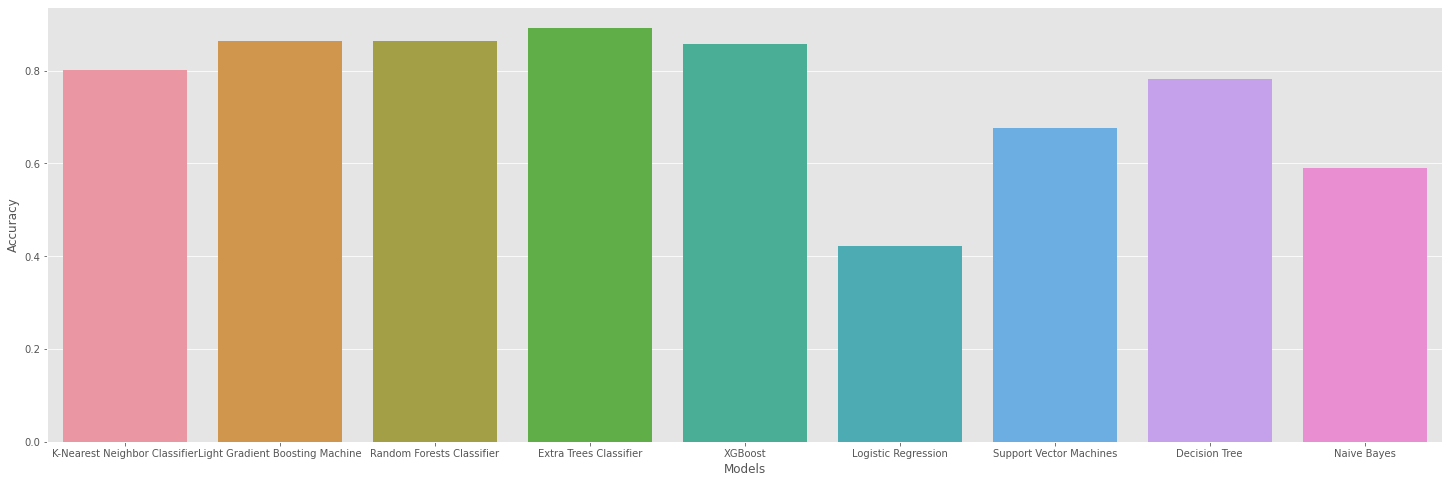

In [ ]:
plt.figure(figsize=(25,8))
ax = sns.barplot(x=evalTable['Models'], y=evalTable['Accuracy'])

### Inference
- From this we can see that XG Boost is having maximum accuracy. 